In [153]:
import sys
import argparse
from trainer import TrainerRegression
import mplfinance as mpf
import numpy as np
import numba as nb
import pandas as pd
from numba import cuda
import seaborn as sns
import torch
from unittest import TestCase
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.spatial.distance as ssd
import stumpy
import matplotlib.pyplot as plt

In [192]:
ohlcv_dict = dict(np.load('data/ohlcv.npy', allow_pickle=True).item().items())
ohlcv = ohlcv_dict.get(86400)
patterns_dict = dict(np.load('data/patterns.npy', allow_pickle=True).item().items())
patterns = patterns_dict.get(3600)
advantage_dict = dict(np.load('data/advantage.npy', allow_pickle=True).item().items())
advantage = advantage_dict.get(3600)

In [193]:
new_trans = np.load('data/new_y_tranformation.npy', allow_pickle=True)

In [249]:
time_series = ohlcv[:, -2]
target = np.zeros(len(time_series))
target[1:] = new_trans[:-1, -1]

In [ ]:
# time_series_train = time_series[:int(len(time_series) * 0.8)]
# time_series_train = np.concatenate([time_series_train, ohlcv_dict.get(86400)[:, -2][: int(len(ohlcv_dict.get(86400)*0.8))]], axis=0)
# time_series_test = time_series[int(len(time_series) * 0.8):]
# target_train = np.concatenate([target[:int(len(target) * 0.8)], advantage_dict.get(86400)[:, -1][: int(len(advantage_dict.get(86400)*0.8))]], axis=0)
# target_test = target[int(len(target) * 0.8):]

In [ ]:
# window_size = 12
# time_series_detrend_train = time_series_train[window_size-1:] - np.convolve(time_series_train, np.ones(window_size)/window_size, mode='valid')
# time_series_detrend_test = time_series_test[window_size-1:] - np.convolve(time_series_test, np.ones(window_size)/window_size, mode='valid')
# # seasonal_series = seasonal_decompose(time_series, model='additive', period=12).seasonal *10**7
# time_series_train = time_series_train[window_size-1:]
# time_series_test = time_series_test[window_size-1:]
# target_train = target_train[window_size-1:]
# target_test = target_test[window_size-1:]

In [ ]:
# mp = stumpy.stump(time_series_train, m=12)

In [ ]:
# list_motifs = stumpy.motifs(
#     time_series_train,
#     mp[:, 0],
#     max_distance=1.1, max_motifs = 20, max_matches = 1000)
# # plt.plot(advantage[list_motifs[1], -1].squeeze())
# dis, idxes = list_motifs

In [ ]:
# centroids_train = idxes[:, 0]

In [ ]:
# np.percentile(mp[:, 0], 50)

In [ ]:
# for i in range(len(centroids_train)):
#     start_idx = idxes[:, 0][i]
#     cluster_dis = stumpy.mass(time_series_train[start_idx:start_idx+12], time_series_test)
#     cluster_idx = np.where(cluster_dis < np.percentile(mp[:, 0], 50))[0]
#     target_pred = target_test[cluster_idx]
#     print(np.percentile(target_pred, 50), len(target_pred))
#     if i >=3:
#         break

In [ ]:
# for i in range(len(idxes)):
#     print(np.median(target_train[idxes[i][np.where(idxes[i]>0)]]), len(idxes[i][np.where(idxes[i]>0)]))

In [ ]:
# # Plot the time series
# plt.figure(figsize=(20, 6))
# plt.plot(time_series, linestyle='-', color='b')

# for idx in list_motifs[1][1]:
#     plt.plot(list(range(idx, idx+12, 1)),time_series[idx:idx+12], c='red', linewidth=4)
#     plt.axvline(x=idx, linestyle="dashed", c='black')
# # Set labels and title
# plt.xlabel('Time')
# plt.ylabel('Volum')
# plt.title('Time Series Plot')

# # Display the plot
# plt.show()

In [ ]:
# # Plot the time series
# plt.figure(figsize=(20, 6))
# plt.plot(target, linestyle='-', color='b')

# for idx in list_motifs[1][0]:
#     plt.plot(list(range(idx, idx+12, 1)),target[idx:idx+12], c='red', linewidth=4)
#     plt.axvline(x=idx, linestyle="dashed", c='black')
# # Set labels and title
# plt.xlabel('Time')
# plt.ylabel('Close Price')
# plt.title('Time Series Plot')

# # Display the plot
# plt.show()

In [ ]:
# k = 0
# cluster = 0
# for i, idx in enumerate(idxes[cluster][np.where(idxes[cluster]>0)]):
#     if i < k:
#         continue
#     plt.plot(time_series_train[idx:idx+26], c='blue', linewidth=4)
#     plt.axvline(x=12, linestyle="dashed", c='black')
#     plt.show()
#     if i > k+20:
#         break

In [ ]:
# k = 0
# for i, idx in enumerate(cluster_idx):
#     if i < k:
#         continue
#     plt.plot(time_series_test[idx:idx+26], c='blue', linewidth=4)
#     plt.axvline(x=12, linestyle="dashed", c='black')
#     plt.show()
    
#     if i > k+60:
#         break

In [ ]:
# subplots = 15
# fig, axs = plt.subplots(subplots, sharex=True, gridspec_kw={'hspace': 0})

# for i,idx in enumerate(list_motifs[1][-2]) :
#     axs[i].plot(time_series[idx:idx+16])
#     axs[i].axvline(x=12, linestyle="dashed", c='black')
#     if i >= subplots-1:
#         break
# plt.show()

In [6]:
# import numpy as np
# import torch
# from typing import Optional
# from scipy.optimize import linear_sum_assignment


# class KmeansCustom:
    
#     def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, verbose=True):
#         self.n_clusters = n_clusters
#         self.max_iter = max_iter
#         self.tol = tol
#         self.verbose = verbose
        
#     def fit(self, X, window_size=12):
#         self.labels_, self.cluster_centers_ = self.kmeans_single_stumpy(X, window_size=window_size)
#         return self
    
#     def fit_predict(self, X, window_size=12):
#         self.fit(X, window_size=window_size)
#         return self.labels_
    
#     def kmeans_single_stumpy(
#         self,
#         X,  # Time series dataset
#         window_size=12,
#     ):
#         n_samples = X.shape[0]
#         labels = np.zeros(n_samples - window_size, dtype=int)
#         centers_init = X[:self.n_clusters, :]
#         subsquence_X = X.flatten()
#         centers = centers_init.copy()

#         for iteration in range(self.max_iter):
#             # Assign labels to each time series based on stumpy.mass
#             ival_idx = np.arange(0, len(subsquence_X), window_size)
#             distance_to_centroids = np.vstack([stumpy.mass(centers[c], subsquence_X)[ival_idx] for c in range(self.n_clusters)])
#             labels = np.argmin(distance_to_centroids, axis=0)
#             # Update centroids
#             new_centers = np.zeros_like(centers)
#             for j in range(self.n_clusters):
#                 assigned_ts = X[labels == j]
#                 # Logic to update the centroid based on assigned time series
#                 new_centers[j] = self.update_centroid(assigned_ts)

#             # Check for convergence (based on a suitable criterion for time series)
#             if np.linalg.norm(centers - new_centers) < self.tol:
#                 if self.verbose:
#                     print(f"Convergence reached at iteration {iteration}")
#                 break

#             centers = new_centers

#         return labels, centers


#     @staticmethod
#     def update_centroid(assigned_ts):
#         return np.mean(assigned_ts, axis=0)
    
#     @staticmethod
#     def reshape_data(data, window_size = 12):
#         data = []
#         for i in range(len(time_series)-window_size+1):
#             data.append(time_series[i:i+window_size])
#         return np.array(data)



# def cluster_accuracy(y_true, y_predicted, cluster_number: Optional[int] = None):
#     """
#     Calculate clustering accuracy after using the linear_sum_assignment function in SciPy to
#     determine reassignments.

#     :param y_true: list of true cluster numbers, an integer array 0-indexed
#     :param y_predicted: list  of predicted cluster numbers, an integer array 0-indexed
#     :param cluster_number: number of clusters, if None then calculated from input
#     :return: reassignment dictionary, clustering accuracy
#     """
#     if cluster_number is None:
#         cluster_number = (
#             max(y_predicted.max(), y_true.max()) + 1
#         )  # assume labels are 0-indexed
#     count_matrix = np.zeros((cluster_number, cluster_number), dtype=np.int64)
#     for i in range(y_predicted.size):
#         count_matrix[y_predicted[i], y_true[i]] += 1

#     row_ind, col_ind = linear_sum_assignment(count_matrix.max() - count_matrix)
#     reassignment = dict(zip(row_ind, col_ind))
#     accuracy = count_matrix[row_ind, col_ind].sum() / y_predicted.size
#     return reassignment, accuracy


# def target_distribution(batch: torch.Tensor) -> torch.Tensor:
#     """
#     Compute the target distribution p_ij, given the batch (q_ij), as in 3.1.3 Equation 3 of
#     Xie/Girshick/Farhadi; this is used the KL-divergence loss function.

#     :param batch: [batch size, number of clusters] Tensor of dtype float
#     :return: [batch size, number of clusters] Tensor of dtype float
#     """
#     weight = (batch ** 2) / torch.sum(batch, 0)
#     return (weight.t() / torch.sum(weight, 1)).t()

In [ ]:
# import torch
# import torch.nn as nn
# from torch.nn import Parameter
# from typing import Optional


# class ClusterAssignment(nn.Module):
#     def __init__(
#         self,
#         cluster_number: int,
#         embedding_dimension: int,
#         alpha: float = 1.0,
#         cluster_centers: Optional[torch.Tensor] = None,
#     ) -> None:
#         """
#         Module to handle the soft assignment, for a description see in 3.1.1. in Xie/Girshick/Farhadi,
#         where the Student's t-distribution is used measure similarity between feature vector and each
#         cluster centroid.

#         :param cluster_number: number of clusters
#         :param embedding_dimension: embedding dimension of feature vectors
#         :param alpha: parameter representing the degrees of freedom in the t-distribution, default 1.0
#         :param cluster_centers: clusters centers to initialise, if None then use Xavier uniform
#         """
#         super(ClusterAssignment, self).__init__()
#         self.embedding_dimension = embedding_dimension
#         self.cluster_number = cluster_number
#         self.alpha = alpha
#         if cluster_centers is None:
#             initial_cluster_centers = torch.zeros(
#                 self.cluster_number, self.embedding_dimension, dtype=torch.float
#             )
#             nn.init.xavier_uniform_(initial_cluster_centers)
#         else:
#             initial_cluster_centers = cluster_centers
#         self.cluster_centers = Parameter(initial_cluster_centers)

#     def forward(self, batch: torch.Tensor) -> torch.Tensor:
#         """
#         Compute the soft assignment for a batch of feature vectors, returning a batch of assignments
#         for each cluster.

#         :param batch: FloatTensor of [batch size, embedding dimension]
#         :return: FloatTensor [batch size, number of clusters]
#         """
#         norm_squared = torch.sum((batch.unsqueeze(1) - self.cluster_centers) ** 2, 2)
#         numerator = 1.0 / (1.0 + (norm_squared / self.alpha))
#         power = float(self.alpha + 1) / 2
#         numerator = numerator ** power
#         return numerator / torch.sum(numerator, dim=1, keepdim=True)

In [ ]:
# class DEC(nn.Module):
#     def __init__(
#         self,
#         cluster_number: int,
#         hidden_dimension: int,
#         encoder: torch.nn.Module,
#         alpha: float = 1.0,
#     ):
#         """
#         Module which holds all the moving parts of the DEC algorithm, as described in
#         Xie/Girshick/Farhadi; this includes the AutoEncoder stage and the ClusterAssignment stage.

#         :param cluster_number: number of clusters
#         :param hidden_dimension: hidden dimension, output of the encoder
#         :param encoder: encoder to use
#         :param alpha: parameter representing the degrees of freedom in the t-distribution, default 1.0
#         """
#         super(DEC, self).__init__()
#         self.encoder = encoder
#         self.hidden_dimension = hidden_dimension
#         self.cluster_number = cluster_number
#         self.alpha = alpha
#         self.assignment = ClusterAssignment(
#             cluster_number, self.hidden_dimension, alpha
#         )

#     def forward(self, batch: torch.Tensor) -> torch.Tensor:
#         """
#         Compute the cluster assignment using the ClusterAssignment after running the batch
#         through the encoder part of the associated AutoEncoder module.

#         :param batch: [batch size, embedding dimension] FloatTensor
#         :return: [batch size, number of clusters] FloatTensor
#         """
#         return self.assignment(self.encoder(batch))

In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans
# import torch
# import torch.nn as nn
# from torch.utils.data.dataloader import DataLoader, default_collate
# from typing import Tuple, Callable, Optional, Union
# from tqdm import tqdm


# def train_dec(
#     dataset: torch.utils.data.Dataset,
#     sequence_reference: np.ndarray,
#     model: torch.nn.Module,
#     epochs: int,
#     batch_size: int,
#     optimizer: torch.optim.Optimizer,
#     stopping_delta: Optional[float] = None,
#     collate_fn=default_collate,
#     cuda: bool = True,
#     sampler: Optional[torch.utils.data.sampler.Sampler] = None,
#     silent: bool = False,
#     update_freq: int = 10,
#     evaluate_batch_size: int = 1024,
#     update_callback: Optional[Callable[[float, float], None]] = None,
#     epoch_callback: Optional[Callable[[int, torch.nn.Module], None]] = None,
# ) -> None:
#     """
#     Train the DEC model given a dataset, a model instance and various configuration parameters.

#     :param dataset: instance of Dataset to use for training
#     :param model: instance of DEC model to train
#     :param epochs: number of training epochs
#     :param batch_size: size of the batch to train with
#     :param optimizer: instance of optimizer to use
#     :param stopping_delta: label delta as a proportion to use for stopping, None to disable, default None
#     :param collate_fn: function to merge a list of samples into mini-batch
#     :param cuda: whether to use CUDA, defaults to True
#     :param sampler: optional sampler to use in the DataLoader, defaults to None
#     :param silent: set to True to prevent printing out summary statistics, defaults to False
#     :param update_freq: frequency of batches with which to update counter, None disables, default 10
#     :param evaluate_batch_size: batch size for evaluation stage, default 1024
#     :param update_callback: optional function of accuracy and loss to update, default None
#     :param epoch_callback: optional function of epoch and model, default None
#     :return: None
#     """
#     static_dataloader = DataLoader(
#         dataset,
#         batch_size=batch_size,
#         collate_fn=collate_fn,
#         pin_memory=False,
#         sampler=sampler,
#         shuffle=False,
#     )
#     train_dataloader = DataLoader(
#         dataset,
#         batch_size=batch_size,
#         collate_fn=collate_fn,
#         sampler=sampler,
#         shuffle=True,
#     )
#     data_iterator = tqdm(
#         static_dataloader,
#         leave=True,
#         unit="batch",
#         postfix={
#             "epo": -1,
#             "acc": "%.4f" % 0.0,
#             "lss": "%.8f" % 0.0,
#             "dlb": "%.4f" % -1,
#         },
#         disable=silent,
#     )
#     kmeans = KmeansCustom(n_clusters=model.cluster_number)
#     model.train()
#     features = []
#     actual = []
#     # form initial cluster centres
#     for index, batch in enumerate(data_iterator):
#         if (isinstance(batch, tuple) or isinstance(batch, list)) and len(batch) == 2:
#             batch, value = batch  # if we have a prediction label, separate it to actual
#             actual.append(value)
#         elif (isinstance(batch, tuple) or isinstance(batch, list)) and len(batch) == 1:
#             batch = batch[0]
#         if cuda:
#             batch = batch.cuda(non_blocking=True)
#         features.append(model.encoder(batch).detach().cpu())
        
#     predicted = kmeans.fit_predict(torch.cat(features).numpy().astype(np.float64), window_size= model.hidden_dimension)
#     predicted_previous = torch.tensor(np.copy(predicted), dtype=torch.long)
#     cluster_centers = torch.tensor(
#         kmeans.cluster_centers_, dtype=torch.float, requires_grad=True
#     )
#     if cuda:
#         cluster_centers = cluster_centers.cuda(non_blocking=True)
#     with torch.no_grad():
#         # initialise the cluster centers
#         model.state_dict()["assignment.cluster_centers"].copy_(cluster_centers)
#     loss_function = nn.KLDivLoss(size_average=False)
#     delta_label = None
#     for epoch in range(epochs):
#         features = []
#         data_iterator = tqdm(
#             train_dataloader,
#             leave=True,
#             unit="batch",
#             postfix={
#                 "epo": epoch,
#                 "lss": "%.8f" % 0.0,
#                 "dlb": "%.4f" % (delta_label or 0.0),
#             },
#             disable=silent,
#         )
#         model.train()
#         for index, batch in enumerate(data_iterator):
#             if (isinstance(batch, tuple) or isinstance(batch, list)) and len(
#                 batch
#             ) == 2:
#                 batch, _ = batch  # if we have a prediction label, strip it away
#             elif (isinstance(batch, tuple) or isinstance(batch, list)) and len(
#                 batch
#             ) == 1:
#                 batch = batch[0]
#             if cuda:
#                 batch = batch.cuda(non_blocking=True)
#             output = model(batch)
#             target = target_distribution(output).detach()
#             loss = loss_function(output.log(), target) / output.shape[0]
#             data_iterator.set_postfix(
#                 epo=epoch,
#                 lss="%.8f" % float(loss.item()),
#                 dlb="%.4f" % (delta_label or 0.0),
#             )
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step(closure=None)
#             features.append(model.encoder(batch).detach().cpu())
#             if update_freq is not None and index % update_freq == 0:
#                 loss_value = float(loss.item())
#                 data_iterator.set_postfix(
#                     epo=epoch,
#                     lss="%.8f" % loss_value,
#                     dlb="%.4f" % (delta_label or 0.0),
#                 )
#                 if update_callback is not None:
#                     update_callback(loss_value, delta_label)

#         predicted = predict_dec(
#             dataset,
#             model,
#             batch_size=evaluate_batch_size,
#             collate_fn=collate_fn,
#             silent=True,
#             return_actual=False,
#             cuda=cuda,
#         )
#         delta_label = (
#             float((predicted != predicted_previous).float().sum().item())
#             / predicted_previous.shape[0]
#         )
#         if stopping_delta is not None and delta_label < stopping_delta:
#             print(
#                 'Early stopping as label delta "%1.5f" less than "%1.5f".'
#                 % (delta_label, stopping_delta)
#             )
#             break
#         predicted_previous = predicted
#         data_iterator.set_postfix(
#             epo=epoch,
#             lss="%.8f" % 0.0,
#             dlb="%.4f" % (delta_label or 0.0),
#         )
#         if epoch_callback is not None:
#             epoch_callback(epoch, model)


# def predict_dec(
#     dataset: torch.utils.data.Dataset,
#     model: torch.nn.Module,
#     batch_size: int = 1024,
#     collate_fn=default_collate,
#     cuda: bool = True,
#     silent: bool = False,
#     return_actual: bool = False,
# ) -> Union[Tuple[torch.Tensor, torch.Tensor], torch.Tensor]:
#     """
#     Predict clusters for a dataset given a DEC model instance and various configuration parameters.

#     :param dataset: instance of Dataset to use for training
#     :param model: instance of DEC model to predict
#     :param batch_size: size of the batch to predict with, default 1024
#     :param collate_fn: function to merge a list of samples into mini-batch
#     :param cuda: whether CUDA is used, defaults to True
#     :param silent: set to True to prevent printing out summary statistics, defaults to False
#     :param return_actual: return actual values, if present in the Dataset
#     :return: tuple of prediction and actual if return_actual is True otherwise prediction
#     """
#     dataloader = DataLoader(
#         dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False
#     )
#     data_iterator = tqdm(dataloader, leave=True, unit="batch", disable=silent,)
#     features = []
#     actual = []
#     model.eval()
#     for batch in data_iterator:
#         if (isinstance(batch, tuple) or isinstance(batch, list)) and len(batch) == 2:
#             batch, value = batch  # unpack if we have a prediction label
#             if return_actual:
#                 actual.append(value)
#         elif (isinstance(batch, tuple) or isinstance(batch, list)) and len(batch) == 1:
#             batch = batch[0]
#         elif return_actual:
#             raise ValueError(
#                 "Dataset has no actual value to unpack, but return_actual is set."
#             )
#         if cuda:
#             batch = batch.cuda(non_blocking=True)
#         features.append(
#             model(batch).detach().cpu()
#         )  # move to the CPU to prevent out of memory on the GPU
#     if return_actual:
#         return torch.cat(features).max(1)[1], torch.cat(actual).long()
#     else:
#         return torch.cat(features).max(1)[1]

In [ ]:
# class TestClusterAssignment(TestCase):
#     @classmethod
#     def setUpClass(cls):
#         cls.ca = ClusterAssignment(
#             cluster_number=2,
#             embedding_dimension=2,
#             cluster_centers=torch.Tensor([[-1, -1], [1, 1]]).float(),
#         )

#     def test_forward(self):
#         """
#         Basic test to check that the calculation is equivalent to the one in the paper.
#         """
#         window_size = 12
#         data = []
#         for i in range(len(time_series_train)-window_size):
#             data.append(time_series_train[i:i+window_size])
            
#         test_tensor = torch.Tensor(data)
#         den = float(1) / 3 + float(1) / 19
#         gold = torch.Tensor([(float(1) / 3) / den, (float(1) / 19) / den])
        
#         output = self.ca(test_tensor).data
#         self.assertAlmostEqual((gold - output).numpy()[0][0], 0.0)
#         self.assertAlmostEqual((gold - output).numpy()[0][1], 0.0)

In [ ]:
# test_assignment= TestClusterAssignment()
# test_assignment.setUpClass()
# test_assignment.test_forward()

In [ ]:
# from collections import OrderedDict
# from cytoolz.itertoolz import concat, sliding_window
# from typing import Callable, Iterable, Optional, Tuple, List
# import torch
# import torch.nn as nn


# def build_units(
#     dimensions: Iterable[int], activation: Optional[torch.nn.Module]
# ) -> List[torch.nn.Module]:
#     """
#     Given a list of dimensions and optional activation, return a list of units where each unit is a linear
#     layer followed by an activation layer.

#     :param dimensions: iterable of dimensions for the chain
#     :param activation: activation layer to use e.g. nn.ReLU, set to None to disable
#     :return: list of instances of Sequential
#     """

#     def single_unit(in_dimension: int, out_dimension: int) -> torch.nn.Module:
#         unit = [("linear", nn.Linear(in_dimension, out_dimension))]
#         if activation is not None:
#             unit.append(("activation", activation))
#         return nn.Sequential(OrderedDict(unit))

#     return [
#         single_unit(embedding_dimension, hidden_dimension)
#         for embedding_dimension, hidden_dimension in sliding_window(2, dimensions)
#     ]


# def default_initialise_weight_bias_(
#     weight: torch.Tensor, bias: torch.Tensor, gain: float
# ) -> None:
#     """
#     Default function to initialise the weights in a the Linear units of the StackedDenoisingAutoEncoder.

#     :param weight: weight Tensor of the Linear unit
#     :param bias: bias Tensor of the Linear unit
#     :param gain: gain for use in initialiser
#     :return: None
#     """
#     nn.init.xavier_uniform_(weight, gain)
#     nn.init.constant_(bias, 0)


# class StackedDenoisingAutoEncoder(nn.Module):
#     def __init__(
#         self,
#         dimensions: List[int],
#         activation: torch.nn.Module = nn.ReLU(),
#         final_activation: Optional[torch.nn.Module] = nn.ReLU(),
#         weight_init: Callable[
#             [torch.Tensor, torch.Tensor, float], None
#         ] = default_initialise_weight_bias_,
#         gain: float = nn.init.calculate_gain("relu"),
#     ):
#         """
#         Autoencoder composed of a symmetric decoder and encoder components accessible via the encoder and decoder
#         attributes. The dimensions input is the list of dimensions occurring in a single stack
#         e.g. [100, 10, 10, 5] will make the embedding_dimension 100 and the hidden dimension 5, with the
#         autoencoder shape [100, 10, 10, 5, 10, 10, 100].

#         :param dimensions: list of dimensions occurring in a single stack
#         :param activation: activation layer to use for all but final activation, default torch.nn.ReLU
#         :param final_activation: final activation layer to use, set to None to disable, default torch.nn.ReLU
#         :param weight_init: function for initialising weight and bias via mutation, defaults to default_initialise_weight_bias_
#         :param gain: gain parameter to pass to weight_init
#         """
#         super(StackedDenoisingAutoEncoder, self).__init__()
#         self.dimensions = dimensions
#         self.embedding_dimension = dimensions[0]
#         self.hidden_dimension = dimensions[-1]
#         # construct the encoder
#         encoder_units = build_units(self.dimensions[:-1], activation)
#         encoder_units.extend(
#             build_units([self.dimensions[-2], self.dimensions[-1]], None)
#         )
#         self.encoder = nn.Sequential(*encoder_units)
#         # construct the decoder
#         decoder_units = build_units(reversed(self.dimensions[1:]), activation)
#         decoder_units.extend(
#             build_units([self.dimensions[1], self.dimensions[0]], final_activation)
#         )
#         self.decoder = nn.Sequential(*decoder_units)
#         # initialise the weights and biases in the layers
#         for layer in concat([self.encoder, self.decoder]):
#             weight_init(layer[0].weight, layer[0].bias, gain)

#     def get_stack(self, index: int) -> Tuple[torch.nn.Module, torch.nn.Module]:
#         """
#         Given an index which is in [0, len(self.dimensions) - 2] return the corresponding subautoencoder
#         for layer-wise pretraining.

#         :param index: subautoencoder index
#         :return: tuple of encoder and decoder units
#         """
#         if (index > len(self.dimensions) - 2) or (index < 0):
#             raise ValueError(
#                 "Requested subautoencoder cannot be constructed, index out of range."
#             )
#         return self.encoder[index].linear, self.decoder[-(index + 1)].linear

#     def forward(self, batch: torch.Tensor) -> torch.Tensor:
#         encoded = self.encoder(batch)
#         return self.decoder(encoded)

In [ ]:
# import torch
# import torch.nn as nn
# from torch.nn import Parameter
# import torch.nn.functional as F
# from typing import Optional


# class DenoisingAutoencoder(nn.Module):
#     def __init__(
#         self,
#         embedding_dimension: int,
#         hidden_dimension: int,
#         activation: Optional[torch.nn.Module] = nn.ReLU(),
#         gain: float = nn.init.calculate_gain("relu"),
#         corruption: Optional[torch.nn.Module] = None,
#         tied: bool = False,
#     ) -> None:
#         """
#         Autoencoder composed of two Linear units with optional encoder activation and corruption.

#         :param embedding_dimension: embedding dimension, input to the encoder
#         :param hidden_dimension: hidden dimension, output of the encoder
#         :param activation: optional activation unit, defaults to nn.ReLU()
#         :param gain: gain for use in weight initialisation
#         :param corruption: optional unit to apply to corrupt input during training, defaults to None
#         :param tied: whether the autoencoder weights are tied, defaults to False
#         """
#         super(DenoisingAutoencoder, self).__init__()
#         self.embedding_dimension = embedding_dimension
#         self.hidden_dimension = hidden_dimension
#         self.activation = activation
#         self.gain = gain
#         self.corruption = corruption
#         # encoder parameters
#         self.encoder_weight = Parameter(
#             torch.Tensor(hidden_dimension, embedding_dimension)
#         )
#         self.encoder_bias = Parameter(torch.Tensor(hidden_dimension))
#         self._initialise_weight_bias(self.encoder_weight, self.encoder_bias, self.gain)
#         # decoder parameters
#         self._decoder_weight = (
#             Parameter(torch.Tensor(embedding_dimension, hidden_dimension))
#             if not tied
#             else None
#         )
#         self.decoder_bias = Parameter(torch.Tensor(embedding_dimension))
#         self._initialise_weight_bias(self._decoder_weight, self.decoder_bias, self.gain)

#     @property
#     def decoder_weight(self):
#         return (
#             self._decoder_weight
#             if self._decoder_weight is not None
#             else self.encoder_weight.t()
#         )

#     @staticmethod
#     def _initialise_weight_bias(weight: torch.Tensor, bias: torch.Tensor, gain: float):
#         """
#         Initialise the weights in a the Linear layers of the DenoisingAutoencoder.

#         :param weight: weight Tensor of the Linear layer
#         :param bias: bias Tensor of the Linear layer
#         :param gain: gain for use in initialiser
#         :return: None
#         """
#         if weight is not None:
#             nn.init.xavier_uniform_(weight, gain)
#         nn.init.constant_(bias, 0)

#     def copy_weights(self, encoder: torch.nn.Linear, decoder: torch.nn.Linear) -> None:
#         """
#         Utility method to copy the weights of self into the given encoder and decoder, where
#         encoder and decoder should be instances of torch.nn.Linear.

#         :param encoder: encoder Linear unit
#         :param decoder: decoder Linear unit
#         :return: None
#         """
#         encoder.weight.data.copy_(self.encoder_weight)
#         encoder.bias.data.copy_(self.encoder_bias)
#         decoder.weight.data.copy_(self.decoder_weight)
#         decoder.bias.data.copy_(self.decoder_bias)

#     def encode(self, batch: torch.Tensor) -> torch.Tensor:
#         transformed = F.linear(batch, self.encoder_weight, self.encoder_bias)
#         if self.activation is not None:
#             transformed = self.activation(transformed)
#         if self.corruption is not None:
#             transformed = self.corruption(transformed)
#         return transformed

#     def decode(self, batch: torch.Tensor) -> torch.Tensor:
#         return F.linear(batch, self.decoder_weight, self.decoder_bias)

#     def forward(self, batch: torch.Tensor) -> torch.Tensor:
#         return self.decode(self.encode(batch))

In [ ]:
# from typing import Any, Callable, Optional
# import torch
# import torch.nn.functional as F
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from tqdm import tqdm



# def train_sdae(
#     dataset: torch.utils.data.Dataset,
#     autoencoder: torch.nn.Module,
#     epochs: int,
#     batch_size: int,
#     optimizer: torch.optim.Optimizer,
#     scheduler: Any = None,
#     validation: Optional[torch.utils.data.Dataset] = None,
#     corruption: Optional[float] = None,
#     cuda: bool = True,
#     sampler: Optional[torch.utils.data.sampler.Sampler] = None,
#     silent: bool = False,
#     update_freq: Optional[int] = 1,
#     update_callback: Optional[Callable[[float, float], None]] = None,
#     num_workers: Optional[int] = None,
#     epoch_callback: Optional[Callable[[int, torch.nn.Module], None]] = None,
# ) -> None:
#     """
#     Function to train an autoencoder using the provided dataset. If the dataset consists of 2-tuples or lists of
#     (feature, prediction), then the prediction is stripped away.

#     :param dataset: training Dataset, consisting of tensors shape [batch_size, features]
#     :param autoencoder: autoencoder to train
#     :param epochs: number of training epochs
#     :param batch_size: batch size for training
#     :param optimizer: optimizer to use
#     :param scheduler: scheduler to use, or None to disable, defaults to None
#     :param corruption: proportion of masking corruption to apply, set to None to disable, defaults to None
#     :param validation: instance of Dataset to use for validation, set to None to disable, defaults to None
#     :param cuda: whether CUDA is used, defaults to True
#     :param sampler: sampler to use in the DataLoader, set to None to disable, defaults to None
#     :param silent: set to True to prevent printing out summary statistics, defaults to False
#     :param update_freq: frequency of batches with which to update counter, set to None disables, default 1
#     :param update_callback: optional function of loss and validation loss to update
#     :param num_workers: optional number of workers to use for data loading
#     :param epoch_callback: optional function of epoch and model
#     :return: None
#     """
#     dataloader = DataLoader(
#         dataset,
#         batch_size=batch_size,
#         pin_memory=False,
#         sampler=sampler,
#         shuffle=True if sampler is None else False,
#         num_workers=num_workers if num_workers is not None else 0,
#     )
#     if validation is not None:
#         validation_loader = DataLoader(
#             validation,
#             batch_size=batch_size,
#             pin_memory=False,
#             sampler=None,
#             shuffle=False,
#         )
#     else:
#         validation_loader = None
#     loss_function = nn.MSELoss()
#     autoencoder.train()
#     validation_loss_value = -1
#     loss_value = 0
#     for epoch in range(epochs):
#         if scheduler is not None:
#             scheduler.step()
#         data_iterator = tqdm(
#             dataloader,
#             leave=True,
#             unit="batch",
#             postfix={"epo": epoch, "lss": "%.6f" % 0.0, "vls": "%.6f" % -1,},
#             disable=silent,
#         )
#         for index, batch in enumerate(data_iterator):
#             if (
#                 isinstance(batch, tuple)
#                 or isinstance(batch, list)
#                 and len(batch) in [1, 2]
#             ):
#                 batch = batch[0]
#             if cuda:
#                 batch = batch.cuda(non_blocking=True)
#             # run the batch through the autoencoder and obtain the output
#             if corruption is not None:
#                 output = autoencoder(F.dropout(batch, corruption))
#             else:
#                 output = autoencoder(batch)
#             loss = loss_function(output, batch)
#             # accuracy = pretrain_accuracy(output, batch)
#             loss_value = float(loss.item())
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step(closure=None)
#             data_iterator.set_postfix(
#                 epo=epoch, lss="%.6f" % loss_value, vls="%.6f" % validation_loss_value,
#             )
#         if update_freq is not None and epoch % update_freq == 0:
#             if validation_loader is not None:
#                 validation_output = predict(
#                     validation,
#                     autoencoder,
#                     batch_size,
#                     cuda=cuda,
#                     silent=True,
#                     encode=False,
#                 )
#                 validation_inputs = []
#                 for val_batch in validation_loader:
#                     if (
#                         isinstance(val_batch, tuple) or isinstance(val_batch, list)
#                     ) and len(val_batch) in [1, 2]:
#                         validation_inputs.append(val_batch[0])
#                     else:
#                         validation_inputs.append(val_batch)
#                 validation_actual = torch.cat(validation_inputs)
#                 if cuda:
#                     validation_actual = validation_actual.cuda(non_blocking=True)
#                     validation_output = validation_output.cuda(non_blocking=True)
#                 validation_loss = loss_function(validation_output, validation_actual)
#                 # validation_accuracy = pretrain_accuracy(validation_output, validation_actual)
#                 validation_loss_value = float(validation_loss.item())
#                 data_iterator.set_postfix(
#                     epo=epoch,
#                     lss="%.6f" % loss_value,
#                     vls="%.6f" % validation_loss_value,
#                 )
#                 autoencoder.train()
#             else:
#                 validation_loss_value = -1
#                 # validation_accuracy = -1
#                 data_iterator.set_postfix(
#                     epo=epoch, lss="%.6f" % loss_value, vls="%.6f" % -1,
#                 )
#             if update_callback is not None:
#                 update_callback(
#                     epoch,
#                     optimizer.param_groups[0]["lr"],
#                     loss_value,
#                     validation_loss_value,
#                 )
#         if epoch_callback is not None:
#             autoencoder.eval()
#             epoch_callback(epoch, autoencoder)
#             autoencoder.train()


# def pretrain(
#     dataset,
#     autoencoder: StackedDenoisingAutoEncoder,
#     epochs: int,
#     batch_size: int,
#     optimizer: Callable[[torch.nn.Module], torch.optim.Optimizer],
#     scheduler: Optional[Callable[[torch.optim.Optimizer], Any]] = None,
#     validation: Optional[torch.utils.data.Dataset] = None,
#     corruption: Optional[float] = None,
#     cuda: bool = True,
#     sampler: Optional[torch.utils.data.sampler.Sampler] = None,
#     silent: bool = False,
#     update_freq: Optional[int] = 1,
#     update_callback: Optional[Callable[[float, float], None]] = None,
#     num_workers: Optional[int] = None,
#     epoch_callback: Optional[Callable[[int, torch.nn.Module], None]] = None,
# ) -> None:
#     """
#     Given an autoencoder, train it using the data provided in the dataset; for simplicity the accuracy is reported only
#     on the training dataset. If the training dataset is a 2-tuple or list of (feature, prediction), then the prediction
#     is stripped away.

#     :param dataset: instance of Dataset to use for training
#     :param autoencoder: instance of an autoencoder to train
#     :param epochs: number of training epochs
#     :param batch_size: batch size for training
#     :param corruption: proportion of masking corruption to apply, set to None to disable, defaults to None
#     :param optimizer: function taking model and returning optimizer
#     :param scheduler: function taking optimizer and returning scheduler, or None to disable
#     :param validation: instance of Dataset to use for validation
#     :param cuda: whether CUDA is used, defaults to True
#     :param sampler: sampler to use in the DataLoader, defaults to None
#     :param silent: set to True to prevent printing out summary statistics, defaults to False
#     :param update_freq: frequency of batches with which to update counter, None disables, default 1
#     :param update_callback: function of loss and validation loss to update
#     :param num_workers: optional number of workers to use for data loading
#     :param epoch_callback: function of epoch and model
#     :return: None
#     """
#     current_dataset = dataset
#     current_validation = validation
#     number_of_subautoencoders = len(autoencoder.dimensions) - 1
#     for index in range(number_of_subautoencoders):
#         encoder, decoder = autoencoder.get_stack(index)
#         embedding_dimension = autoencoder.dimensions[index]
#         hidden_dimension = autoencoder.dimensions[index + 1]
#         # manual override to prevent corruption for the last subautoencoder
#         if index == (number_of_subautoencoders - 1):
#             corruption = None
#         # initialise the subautoencoder
#         sub_autoencoder = DenoisingAutoencoder(
#             embedding_dimension=embedding_dimension,
#             hidden_dimension=hidden_dimension,
#             activation=torch.nn.ReLU()
#             if index != (number_of_subautoencoders - 1)
#             else None,
#             corruption=nn.Dropout(corruption) if corruption is not None else None,
#         )
#         if cuda:
#             sub_autoencoder = sub_autoencoder.cuda()
#         ae_optimizer = optimizer(sub_autoencoder)
#         ae_scheduler = scheduler(ae_optimizer) if scheduler is not None else scheduler
#         train_sdae(
#             current_dataset,
#             sub_autoencoder,
#             epochs,
#             batch_size,
#             ae_optimizer,
#             validation=current_validation,
#             corruption=None,  # already have dropout in the DAE
#             scheduler=ae_scheduler,
#             cuda=cuda,
#             sampler=sampler,
#             silent=silent,
#             update_freq=update_freq,
#             update_callback=update_callback,
#             num_workers=num_workers,
#             epoch_callback=epoch_callback,
#         )
#         # copy the weights
#         sub_autoencoder.copy_weights(encoder, decoder)
#         # pass the dataset through the encoder part of the subautoencoder
#         if index != (number_of_subautoencoders - 1):
#             current_dataset = TensorDataset(
#                 predict(
#                     current_dataset,
#                     sub_autoencoder,
#                     batch_size,
#                     cuda=cuda,
#                     silent=silent,
#                 )
#             )
#             if current_validation is not None:
#                 current_validation = TensorDataset(
#                     predict(
#                         current_validation,
#                         sub_autoencoder,
#                         batch_size,
#                         cuda=cuda,
#                         silent=silent,
#                     )
#                 )
#         else:
#             current_dataset = None  # minor optimisation on the last subautoencoder
#             current_validation = None


# def predict(
#     dataset: torch.utils.data.Dataset,
#     model: torch.nn.Module,
#     batch_size: int,
#     cuda: bool = True,
#     silent: bool = False,
#     encode: bool = True,
# ) -> torch.Tensor:
#     """
#     Given a dataset, run the model in evaluation mode with the inputs in batches and concatenate the
#     output.

#     :param dataset: evaluation Dataset
#     :param model: autoencoder for prediction
#     :param batch_size: batch size
#     :param cuda: whether CUDA is used, defaults to True
#     :param silent: set to True to prevent printing out summary statistics, defaults to False
#     :param encode: whether to encode or use the full autoencoder
#     :return: predicted features from the Dataset
#     """
#     dataloader = DataLoader(
#         dataset, batch_size=batch_size, pin_memory=False, shuffle=False
#     )
#     data_iterator = tqdm(dataloader, leave=False, unit="batch", disable=silent,)
#     features = []
#     if isinstance(model, torch.nn.Module):
#         model.eval()
#     for batch in data_iterator:
#         if isinstance(batch, tuple) or isinstance(batch, list) and len(batch) in [1, 2]:
#             batch = batch[0]
#         if cuda:
#             batch = batch.cuda(non_blocking=True)
#         batch = batch.squeeze(1).view(batch.size(0), -1)
#         if encode:
#             output = model.encode(batch)
#         else:
#             output = model(batch)
#         features.append(
#             output.detach().cpu()
#         )  # move to the CPU to prevent out of memory on the GPU
#     return torch.cat(features)

In [ ]:
# window = 12
# data = []
# for i in range(len(time_series)-window+1):
#     data.append(time_series[i:i+window])

# data = torch.Tensor(data)
# # detrend_data = data - data.mean(dim= 1, keepdim=True)
# dimensions = [12, 6, 3]
# sdae = StackedDenoisingAutoEncoder(dimensions)

# from torch.utils.data import DataLoader, TensorDataset


# dataset = TensorDataset(data)
# dataloader = DataLoader(dataset, batch_size=32)

# for batch in dataloader:
#     test_batch, = batch  # Extract data (ignoring labels, which don't exist)
#     reconstructed = sdae(test_batch)  # Forward pass
#     print("Input shape:", test_batch.shape)
#     print("Reconstructed shape:", reconstructed.shape)
#     break  # Testing with just one batch

In [ ]:
# num_epochs = 10  # Number of epochs
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(sdae.parameters(), lr=0.001)
# # Training mode
# sdae.train()

# for epoch in range(num_epochs):
#     total_loss = 0
#     for batch in dataloader:
#         # Forward pass
#         inputs, = batch
#         reconstructed = sdae(inputs)

#         # Compute the loss
#         loss = criterion(reconstructed, inputs)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     # Print average loss for the epoch
#     avg_loss = total_loss / len(dataloader)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.8f}")

In [ ]:
# from torch.optim import SGD
# model = DEC(cluster_number=20, hidden_dimension=3, encoder=sdae.encoder)

# dec_optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9)
# train_dec(
#     dataset=dataset,
#     sequence_reference= time_series,
#     model=model,
#     epochs=20,
#     batch_size = 32,
#     optimizer=dec_optimizer,
#     stopping_delta=0.00001,
#     cuda=False,
# )

In [ ]:
# cluster = predict_dec(
#     dataset=dataset,
#     model=model,
#     batch_size=32,
#     cuda=False,)

In [ ]:
# import random

# cluster_indices = np.where(cluster == 5)[0]

# # Randomly sample 100 indices (or use all if there are fewer than 100)
# selected_indices = random.sample(list(cluster_indices), min(len(cluster_indices), 100))

# # Plotting the graphs
# for idx in selected_indices:
#     plt.plot(dataset.tensors[0][idx])
#     plt.xlabel(f'{cluster[idx].item()}')
#     plt.show()

In [226]:
# def kmeans_single_stumpy(
#     X,  # Time series dataset
#     centers_init,  # Initial time series centroids
#     window_size = 3, # Window size for k-means
#     max_iter=300,
#     tol=1e-4,
#     verbose=True,
# ):

#     n_samples = X.shape[0]
#     n_clusters = centers_init.shape[0]
#     labels = np.zeros(n_samples - window_size, dtype=int)
#     centers = centers_init.copy()
#     subsquence_X = reshape_data(X, window_size)

#     for iteration in range(max_iter):
#         # Assign labels to each time series based on stumpy.mass
        
#         distance_to_centroids = np.vstack([stumpy.mass(centers[c], X) for c in range(n_clusters)])
#         labels = np.argmin(distance_to_centroids, axis=0)
#         # Update centroids
#         new_centers = np.zeros_like(centers)
#         for j in range(n_clusters):
#             assigned_ts = subsquence_X[labels == j]
#             # Logic to update the centroid based on assigned time series
#             new_centers[j] = update_centroid(assigned_ts)

#         # Check for convergence (based on a suitable criterion for time series)
#         if np.linalg.norm(centers - new_centers) < tol:
#             if verbose:
#                 print(f"Convergence reached at iteration {iteration}")
#             break

#         centers = new_centers

#     # save the final centroids
#     result = {}
#     result["labels"] = labels
#     result["centers"] = centers
#     result["iteration"] = iteration
#     np.save("data/clusters.npy", result)
#     return labels, centers, iteration


# def update_centroid(assigned_ts):
#     return np.mean(assigned_ts, axis=0)

# def reshape_data(time_series, window_size = 12):
#     data = []
#     for i in range(len(time_series)-window_size+1):
#         data.append(time_series[i:i+window_size])
#     return np.array(data)

In [227]:
class KMeansStumpy:
    def __init__(self, n_clusters, window_size=3, max_iter=300, tol=1e-4, verbose=True):
        self.n_clusters = n_clusters
        self.window_size = window_size
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None
        self.labels_ = None

    def fit(self, X, centers_init):
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples - self.window_size, dtype=int)
        self.centers = centers_init.copy()
        subsquence_X = self.reshape_data(X, self.window_size)

        for iteration in range(self.max_iter):
            distance_to_centroids = np.vstack([stumpy.mass(self.centers[c], X) for c in range(self.n_clusters)])
            self.labels_ = np.argmin(distance_to_centroids, axis=0)

            new_centers = np.zeros_like(self.centers)
            for j in range(self.n_clusters):
                assigned_ts = subsquence_X[self.labels_ == j]
                new_centers[j] = self.update_centroid(assigned_ts)

            if np.linalg.norm(self.centers - new_centers) < self.tol:
                if self.verbose:
                    print(f"Convergence reached at iteration {iteration}")
                break

            self.centers = new_centers
            
        return self

    def predict(self, X):
        if self.centers is None:
            raise Exception("Model not fitted. Call 'fit' with appropriate arguments before calling 'predict'.")

        distance_to_centroids = np.vstack([stumpy.mass(center, X) for center in self.centers])
        return np.argmin(distance_to_centroids, axis=0)

    def fit_predict(self, X, centers_init):
        self.fit(X, centers_init)
        return self.labels_

    def update_centroid(self, assigned_ts):
        return np.mean(assigned_ts, axis=0)

    def reshape_data(self, data, window_size):
        reshaped_data = []
        for i in range(len(data) - window_size + 1):
            reshaped_data.append(data[i:i + window_size])
        return np.array(reshaped_data)

In [228]:
price_patt_train = time_series[:int(len(time_series)*0.4)]
price_series = time_series[int(len(time_series)*0.4):]

window = 5
init_centroids = []
num_centroids = 50
for i in range(num_centroids):
    init_centroids.append(price_patt_train[i:i+window])

In [229]:
kmean = KMeansStumpy(n_clusters=50, window_size= window).fit(price_patt_train, np.array(init_centroids))
price_labels = kmean.predict(price_series)

Convergence reached at iteration 21


In [254]:
# import random
# cluster_indices = np.where(kmean.labels_ == 1)[0]
# # Randomly sample 100 indices (or use all if there are fewer than 100)
# selected_indices = random.sample(list(cluster_indices), min(len(cluster_indices), 20))

# for idx in selected_indices:
#     plt.plot(price_patt_train[idx: idx + window])
#     plt.xlabel(f"{idx}")
#     plt.show()

In [252]:
volume_series = ohlcv[:, -1]

volume_patt_train = volume_series[:int(len(volume_series)*0.4)]
volume_series = volume_series[int(len(volume_series)*0.4):]

window = 5
init_centroids = []
num_centroids = 50
for i in range(num_centroids):
    init_centroids.append(volume_patt_train[i:i+window])

In [253]:
kmean = KMeansStumpy(n_clusters=50, window_size= window).fit(volume_patt_train, np.array(init_centroids))
volume_labels = kmean.predict(volume_series)

Convergence reached at iteration 17


In [233]:
# cluster_indices = np.where(volume_labels == 5)[0]

# # Randomly sample 100 indices (or use all if there are fewer than 100)
# selected_indices = random.sample(list(cluster_indices), min(len(cluster_indices), 10))

# for idx in selected_indices:
#     plt.plot(volume_series_test[idx: idx + window])
#     plt.xlabel(f"{idx}")
#     plt.show()

In [234]:
pat_dict = {}
pat_idx = 0
for patt in zip(price_labels, volume_labels):
    if patt not in pat_dict:
        pat_dict[patt] = pat_idx
        pat_idx += 1

In [235]:
X = np.zeros(len(price_labels))
for i in range(len(price_labels)):
    X[i] = pat_dict[(price_labels[i], volume_labels[i])]

In [236]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X.reshape(-1, 1)).toarray()

target_train = target[:int(len(target)*0.4)]
target_series = target[int(len(target)*0.4):]
target_series = target_series[window-1:]


X_train = X[:int(len(X)*0.7),:]
X_test = X[int(len(X)*0.7):,:]
y_train = target_series[:int(len(target_series)*0.7)]
y_test = target_series[int(len(target_series)*0.7):]

5


In [237]:
from scipy.signal import convolve2d

window_size = (100, 1)

# Create a filter of ones with the window size
filter = np.ones(window_size)

# Compute the sliding sum
X_train = convolve2d(X_train, filter, mode='valid')

In [238]:
y_train_cat = (y_train>0).astype(int)
y_test_cat = (y_test>0).astype(int)

In [256]:
from tensorflow import keras
from tensorflow.keras import layers


n_features = X_train.shape[1]


model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model with binary cross-entropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat[window_size[0]-1:], epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.4763 - accuracy: 0.8257 - val_loss: 0.4932 - val_accuracy: 0.8484
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8450 - val_loss: 0.4856 - val_accuracy: 0.8484
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8450 - val_loss: 0.5028 - val_accuracy: 0.8484
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8450 - val_loss: 0.4796 - val_accuracy: 0.8484
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8450 - val_loss: 0.4817 - val_accuracy: 0.8484
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8450 - val_loss: 0.4804 - val_accuracy: 0.8484
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8450 - val_loss: 0.4623 - val_accuracy: 0.8484
Epoch 8/50
39/39 [==

In [257]:
y_pred_cat = model.predict(X_test)
loss = model.evaluate(X_test, y_test_cat)
print("Mean Squared Error on Test Set:", loss)

23/23 [==============================] - 0s 1ms/step - loss: 0.7251 - accuracy: 0.2956
Mean Squared Error on Test Set: [0.7250751852989197, 0.2956152856349945]


In [258]:
y_pred_prob = model.predict(X_test)
y_pred_prob = y_pred_prob.flatten()
y_pred_cat = (y_pred_prob > 0.5).astype(int)
y_pred_cat

23/23 [==============================] - 0s 818us/step


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

Accuracy: 0.2956152758132956
Precision: 0.18229166666666666
Recall: 0.7954545454545454
F1 Score: 0.2966101694915254
ROC AUC Score: 0.5123978919631094
Confusion Matrix:
[[104 471]
 [ 27 105]]


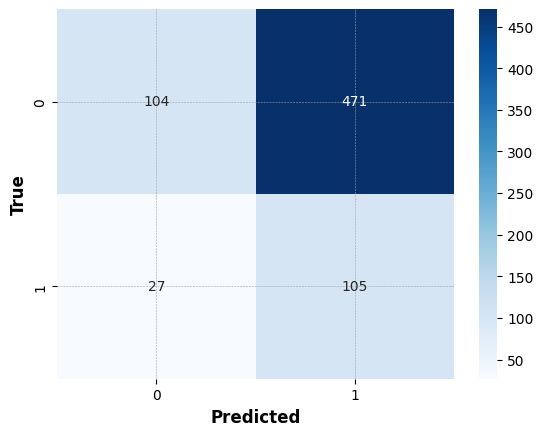

In [259]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_test_cat, y_pred_cat)
precision = precision_score(y_test_cat, y_pred_cat)
recall = recall_score(y_test_cat, y_pred_cat)
f1 = f1_score(y_test_cat, y_pred_cat)
roc_auc = roc_auc_score(y_test_cat, y_pred_prob)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as a Heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [212]:
from itertools import product

def generate_shapelets(length, max_value):
    # Generate all unique combinations of values
    unique_combinations = list(product(range(max_value + 1), repeat=length))
    
    # Convert combinations to arrays
    arrays = [np.array(combination) for combination in unique_combinations]

    # Normalize and remove duplicates
    unique_arrays = []
    seen_array = []
    normalized_array = np.array((arrays - np.mean(arrays, axis = 1, keepdims= True))/np.std(arrays, axis =1, keepdims= True))
    for array in arrays:
        
        if not any(np.array_equal(normalized_array, arr) for arr in seen_array):
            seen_array.append(normalized_array)
            unique_arrays.append(array)
    return unique_arrays


length = 3
max_value = 10
all_shapelets = np.array(generate_shapelets(length = length, max_value = max_value)).astype(np.float64)

C:\Users\autobot\AppData\Local\Temp\ipykernel_40768\3639851166.py:13: RuntimeWarning: invalid value encountered in divide
  normalized_array = np.array((arrays - np.mean(arrays, axis = 1, keepdims= True))/np.std(arrays, axis =1, keepdims= True))


(1331, 3)


In [55]:
def skewness(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    skewness = (n / ((n - 1) * (n - 2))) * np.sum(((data - mean) / std_dev) ** 3) if std_dev != 0 else 0
    return skewness


In [ ]:
interval= 500
len_ses= len(target)
for i in range(1, 200):
    if interval*i > len_ses:
        break
    # sns.displot(target[: interval*i])
    # plt.show()
    # plt.plot(ohlcv[: int(interval*i+interval/10), -2])
    # plt.axvline(x=interval*i, linestyle="dashed", c='black')
    # plt.show()
    print(skewness(target[: interval*i]), np.percentile(target[: interval*i], 50))

In [72]:
init_centroids = []
num_centroids = 50
for i in range(num_centroids):
    init_centroids.append(target[i:i+window])

In [ ]:
m = 6
seq_candles = np.zeros(shape=(4, m))
frame_open = np.array([6, 3, 5, 7]) * 10
frame_high = np.array([8, 5, 7, 9]) * 10
frame_low = np.array([4, 1, 3, 5]) * 10
frame_close = np.array([5, 2, 6, 8]) * 10



if frame_open.shape[0] - 2  > seq_candles.shape[0]:
    raise ValueError("frame array cannot be larger than seq_candles array")

def gen_frame(frame, seq_candles):
    # Generate unique indices using np.random.choice
    unique_indices = np.random.choice(seq_candles.shape[0] - 2, size=frame.shape[0] - 2, replace=False) + 1
    unique_indices.sort()
    seq_candles[0] = frame[0]
    seq_candles[-1] = frame[-1]
    seq_candles[unique_indices] = frame[1:-1]

    unique_indices = np.concatenate((np.array([0]), unique_indices, np.array([seq_candles.shape[0]-1])))
    for i in range(len(frame)-1):
        seq_candles[unique_indices[i]+1: unique_indices[i+1]] = np.random.randint(min(frame[i], frame[i+1]), max(frame[i], frame[i+1]), size=unique_indices[i+1]-unique_indices[i]-1)
    return seq_candles

def gen_candle_frame(frame_open, frame_high, frame_low, frame_close, seq_candles):
    frames = np.stack([frame_open, frame_high, frame_low, frame_close], axis = 0)
    candle_frame = np.zeros_like(seq_candles)
    unique_indices = np.random.choice(seq_candles.shape[1] - 2, size=frames.shape[1] - 2, replace=False) + 1
    unique_indices.sort()
    candle_frame[:, 0] = frames[:, 0]
    candle_frame[:, -1] = frames[:, -1]
    candle_frame[:, unique_indices] = frames[:, 1:-1]
    
    unique_indices = np.concatenate((np.array([0]), unique_indices, np.array([seq_candles.shape[0]-1])))
    for i in range(len(frames)-1):
        candle_frame[0, unique_indices[i]+1: unique_indices[i+1]] = np.random.randint(frames[:, i:i+2].min(), frames[i:i+2].max(), size=unique_indices[i+1]-unique_indices[i]-1)
        candle_frame[3, unique_indices[i]+1: unique_indices[i+1]] = np.random.randint(frames[:, i:i+2].min(), frames[i:i+2].min(), size=unique_indices[i+1]-unique_indices[i]-1)
        bot_high, top_high = 0, 0
        bot_low, top_low = 0, 0
        while bot_high >= top_high:
            bot_high = max(frames[:, i:i+2].min(), candle_frame[0, unique_indices[i]+1: unique_indices[i+1]].max(), candle_frame[3, unique_indices[i]+1: unique_indices[i+1]].max())
            top_high = min(frames[:, i:i+2].max(), candle_frame[0, unique_indices[i]+1: unique_indices[i+1]].min(), candle_frame[3, unique_indices[i]+1: unique_indices[i+1]].min())
        while bot_low >= top_low:
            bot_low = min(frames[:, i:i+2].min(), candle_frame[0, unique_indices[i]+1: unique_indices[i+1]].min(), candle_frame[3, unique_indices[i]+1: unique_indices[i+1]].min())
            top_low = max(frames[:, i:i+2].min(), candle_frame[0, unique_indices[i]+1: unique_indices[i+1]].max(), candle_frame[3, unique_indices[i]+1: unique_indices[i+1]].max())
            
        candle_frame[1, unique_indices[i]+1: unique_indices[i+1]] = np.random.randint(bot_high, top_high, size=unique_indices[i+1]-unique_indices[i]-1)
        candle_frame[2, unique_indices[i]+1: unique_indices[i+1]] = np.random.randint(bot_low, top_low, size=unique_indices[i+1]-unique_indices[i]-1)
    return candle_frame
    
gen_candle_frame(frame_open, frame_high, frame_low, frame_close, seq_candles)

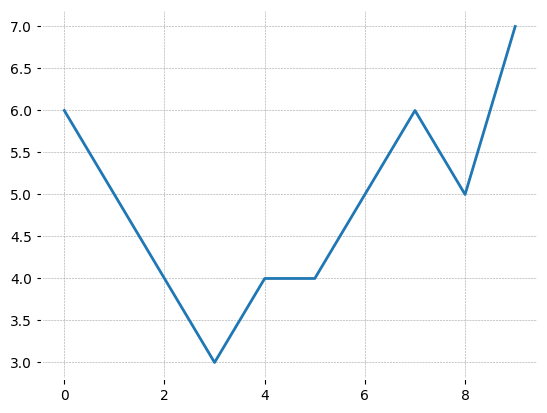

In [128]:
plt.plot(seq_candles)

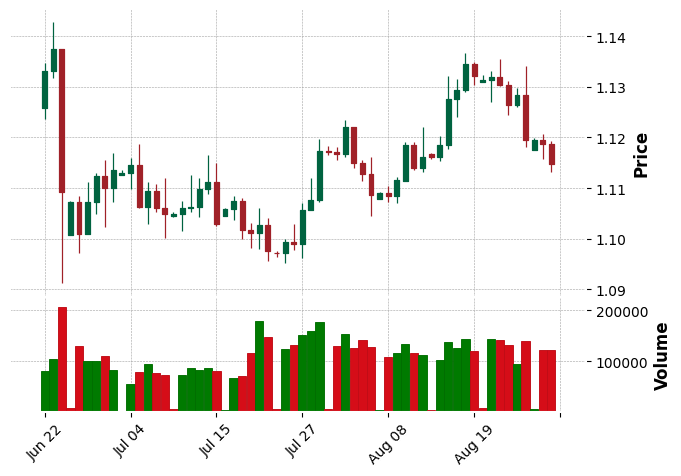

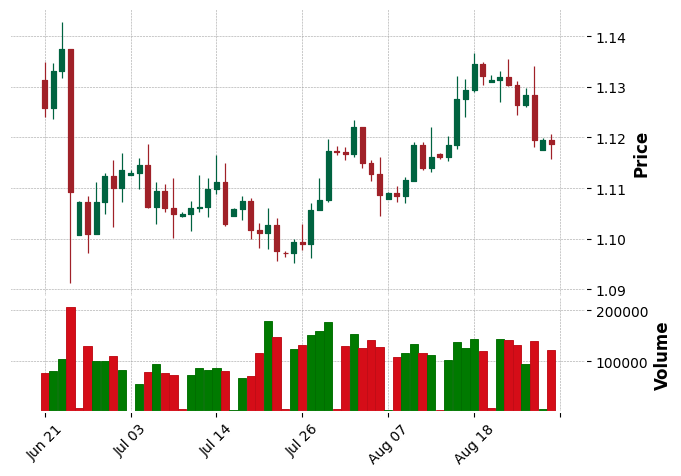

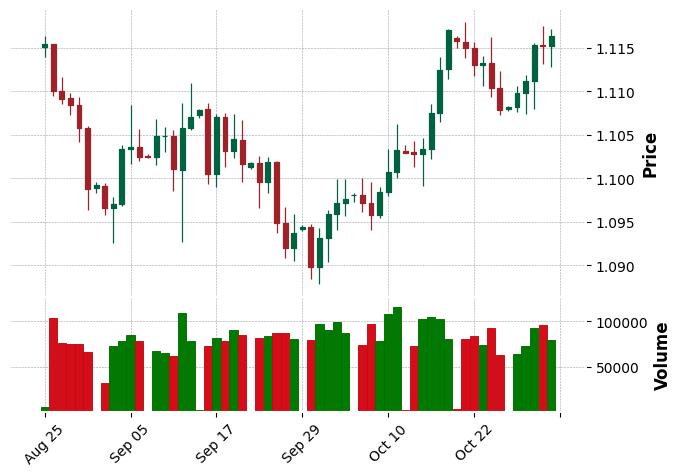

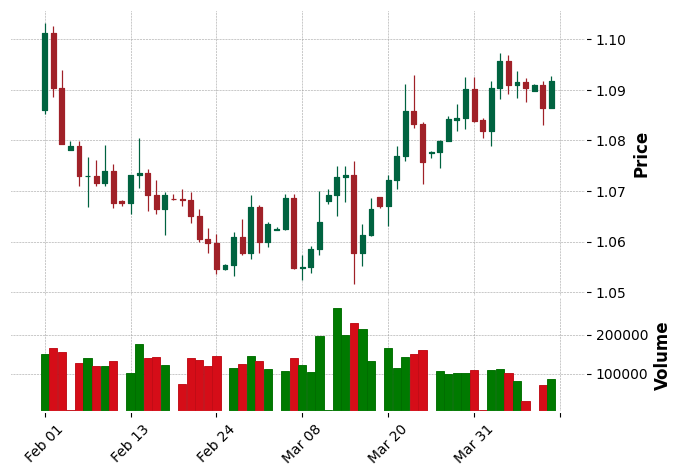

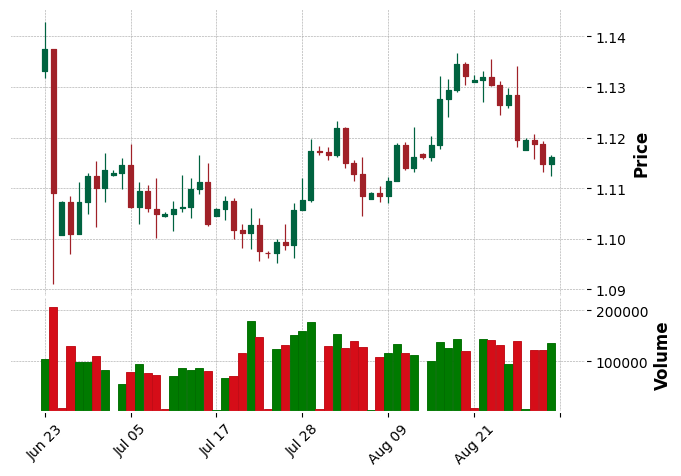

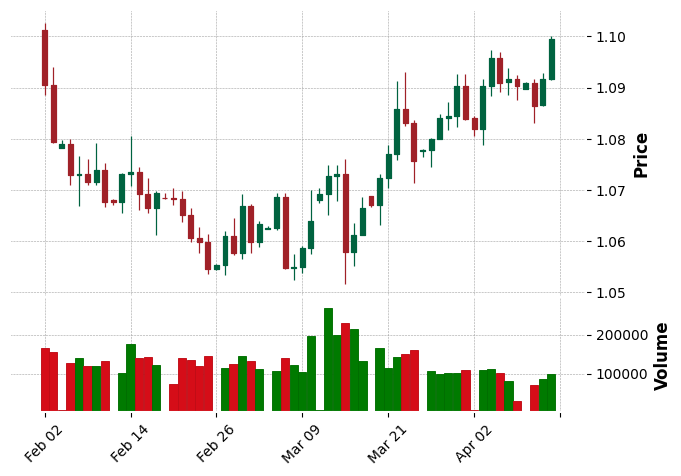

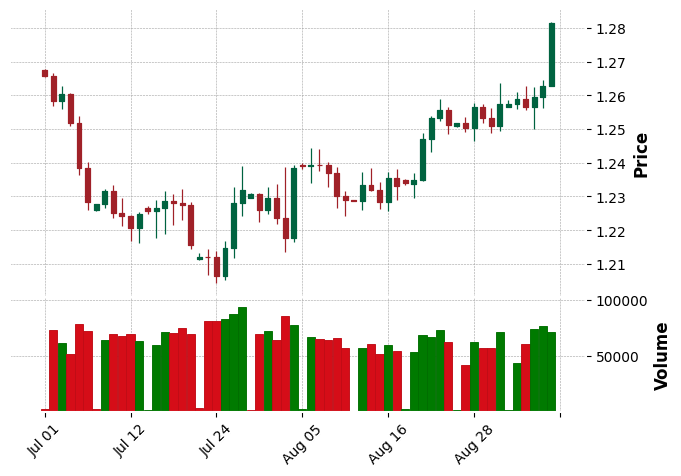

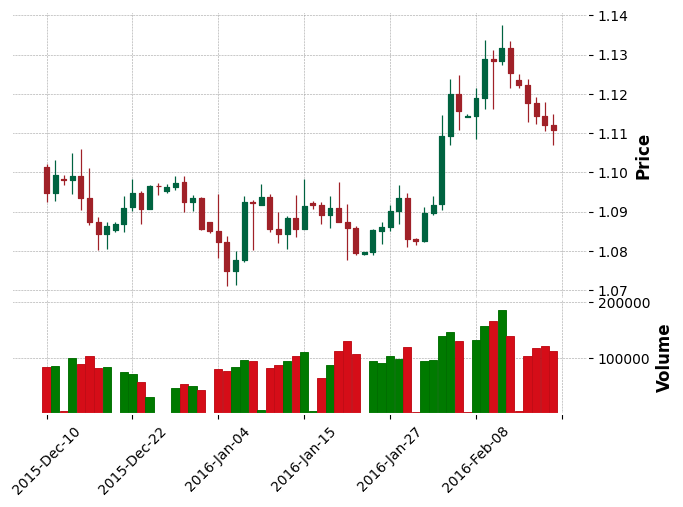

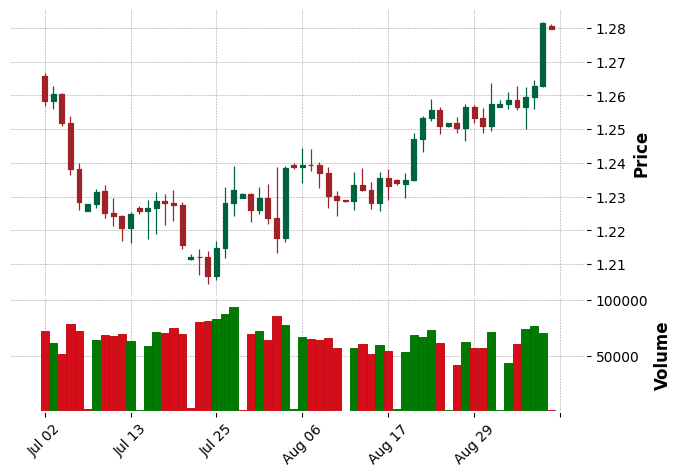

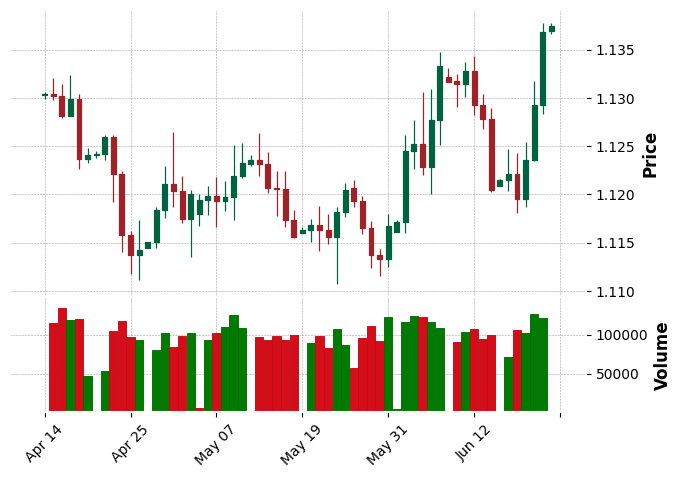

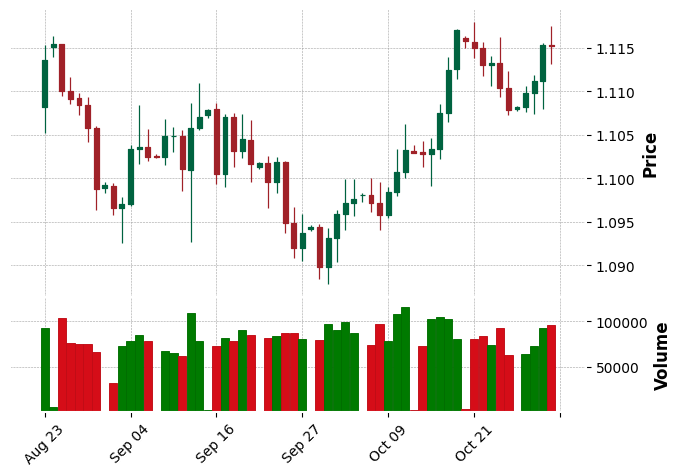

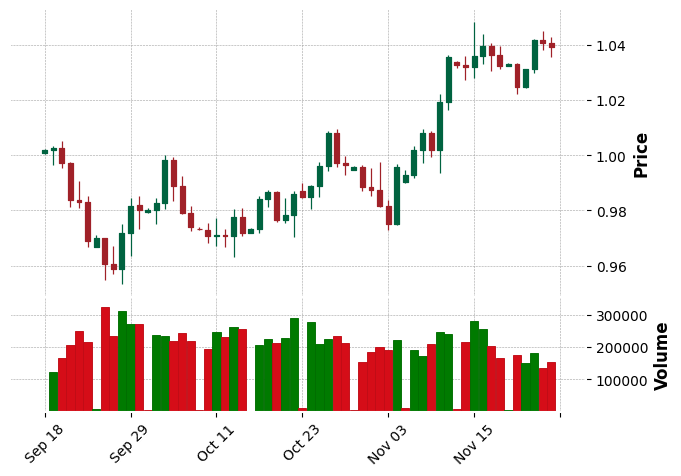

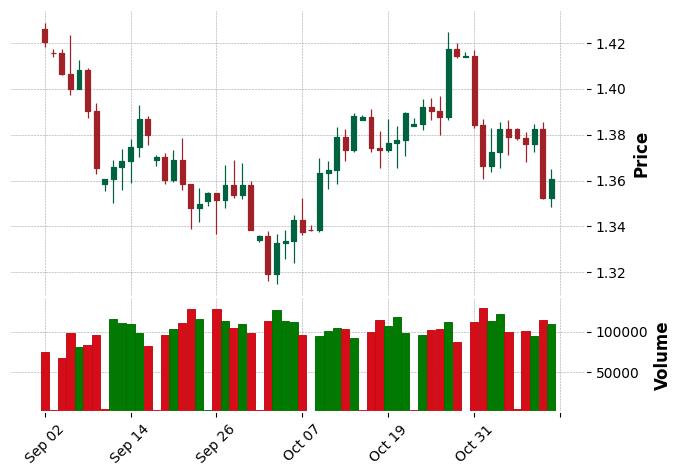

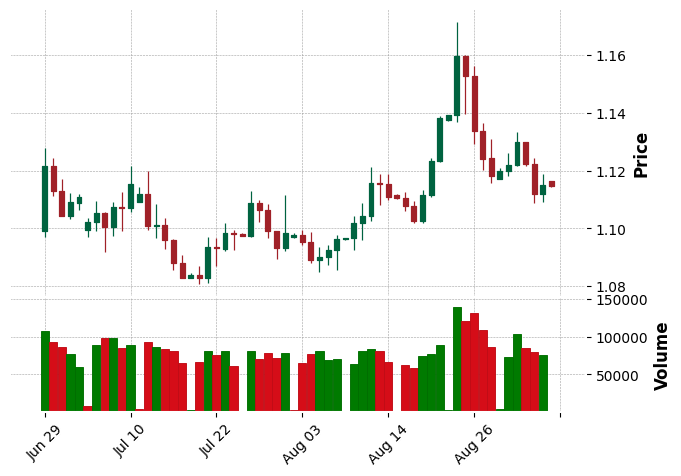

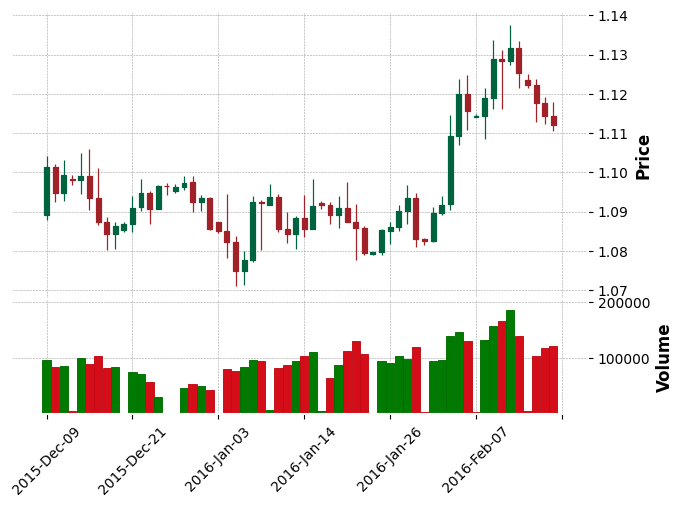

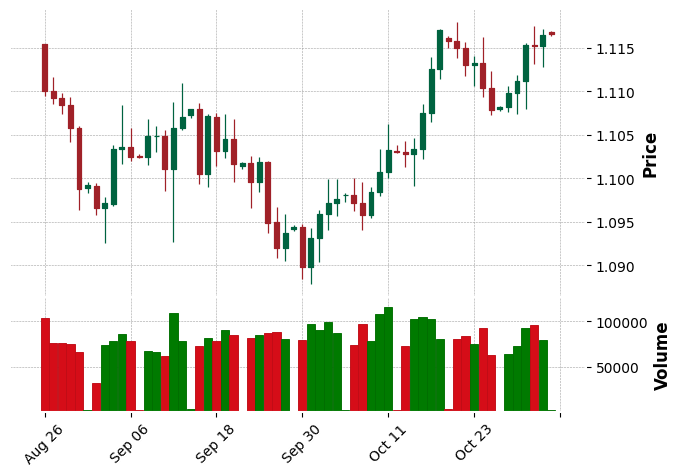

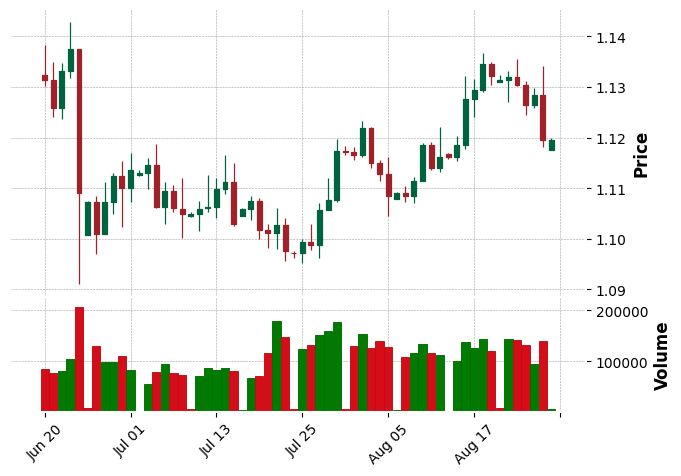

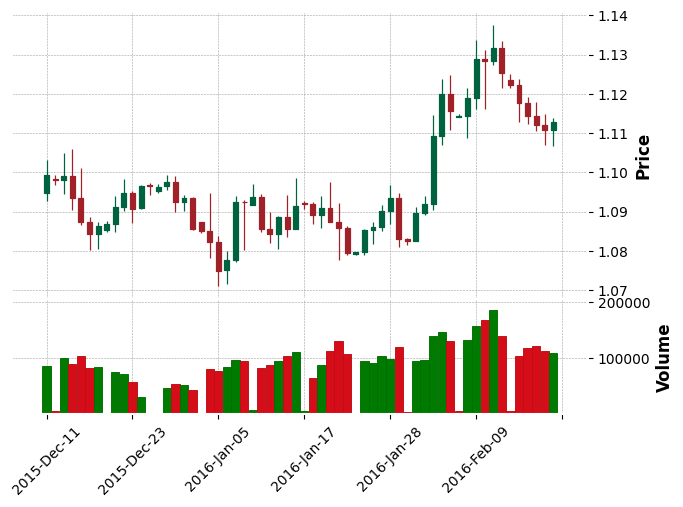

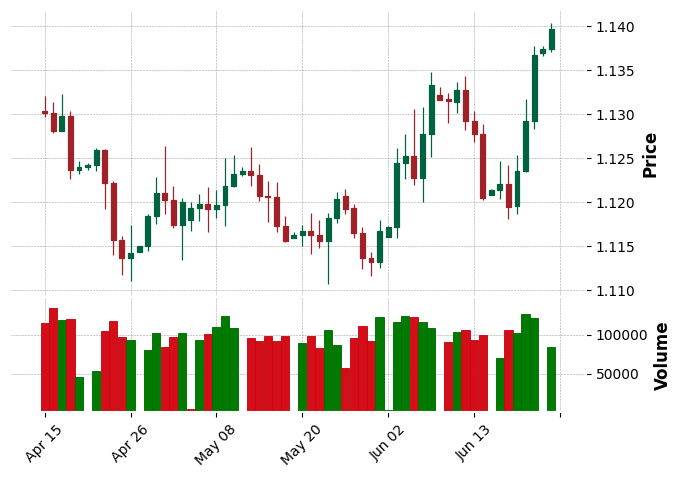

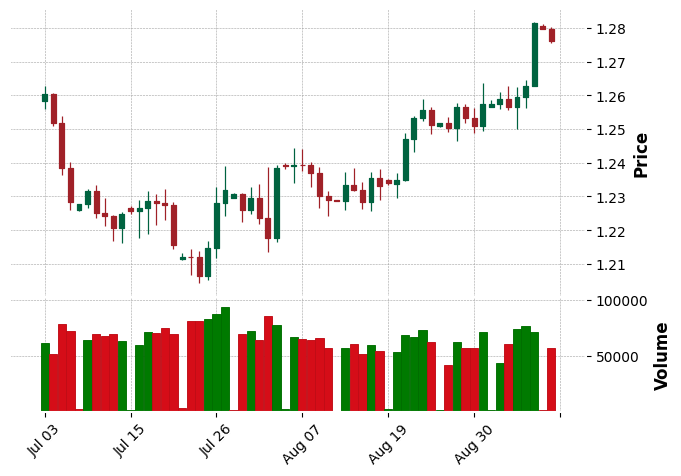

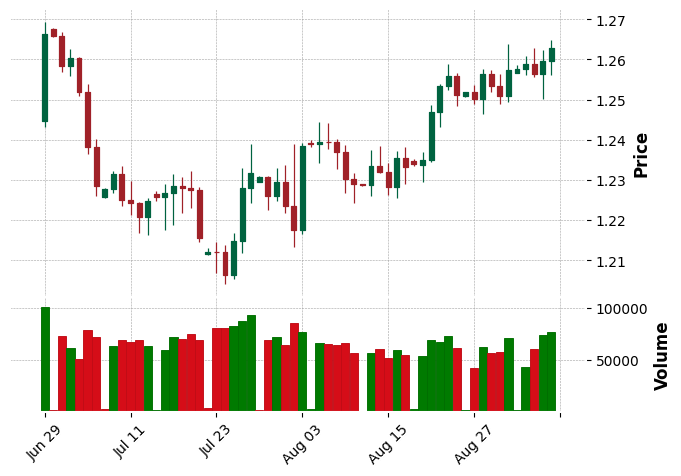

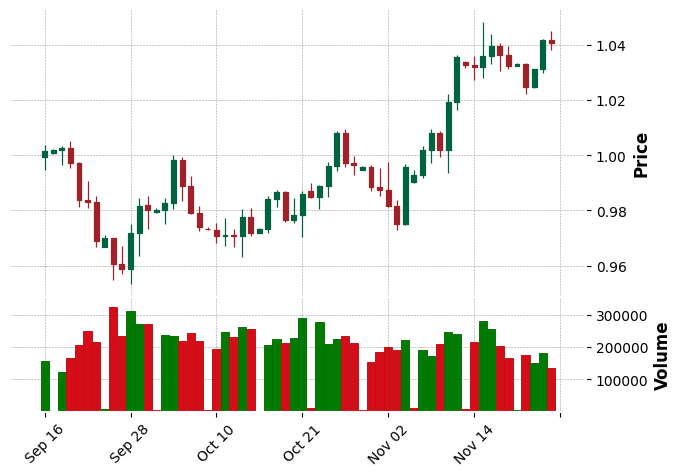

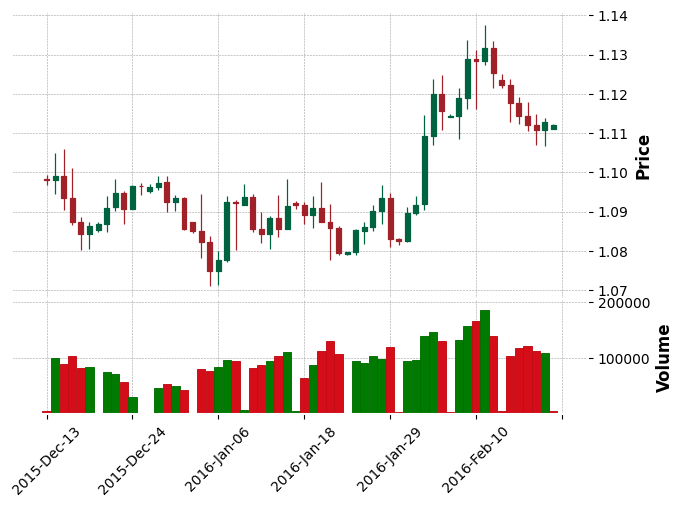

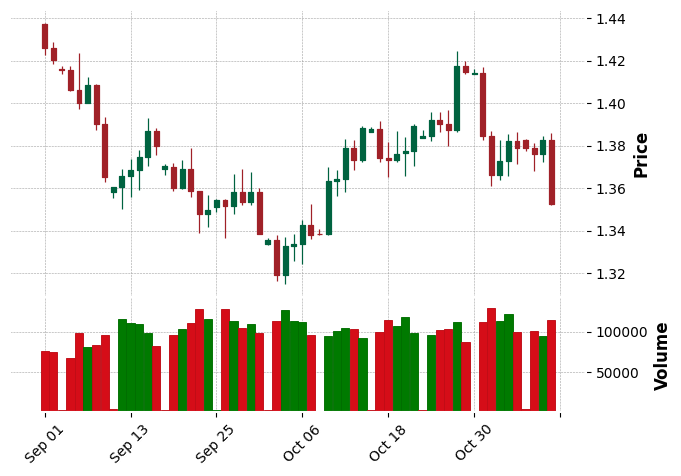

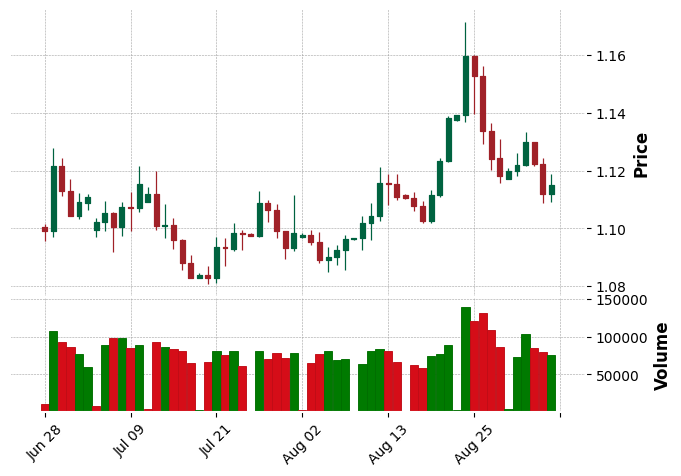

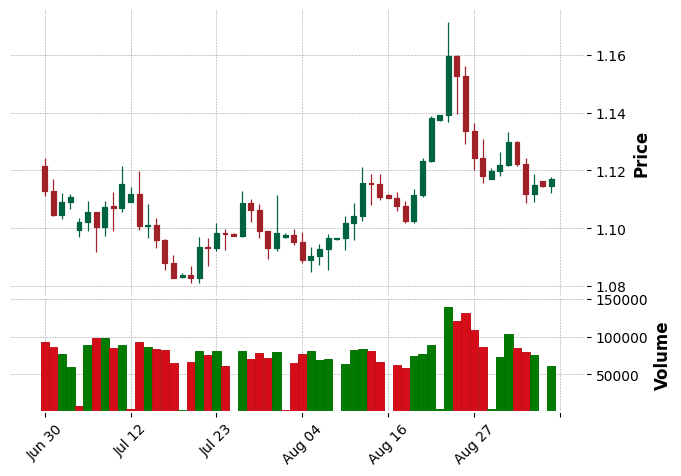

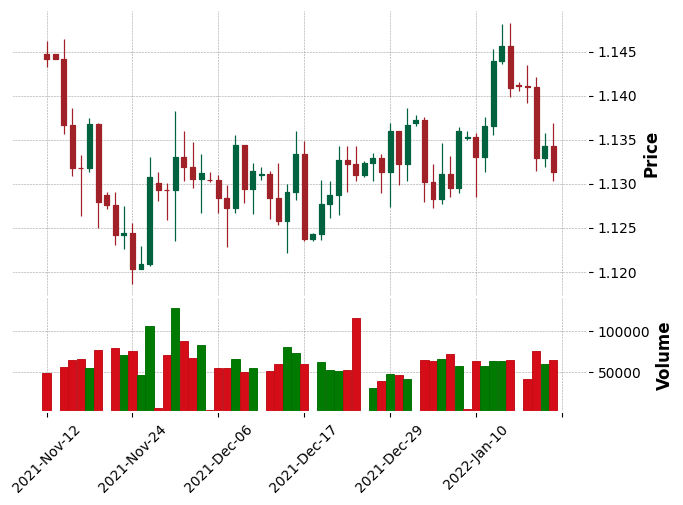

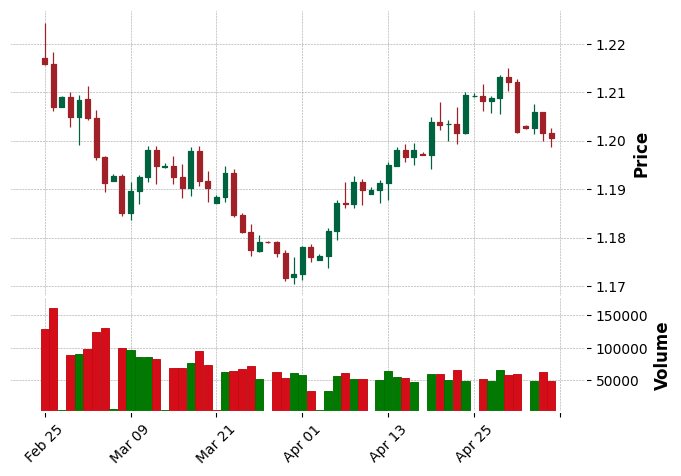

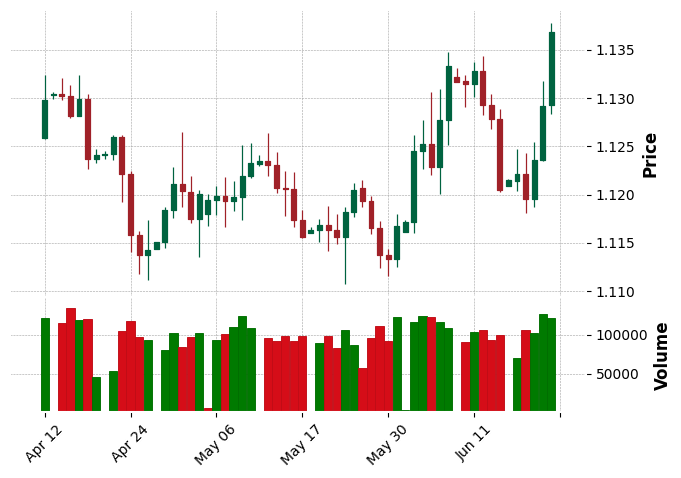

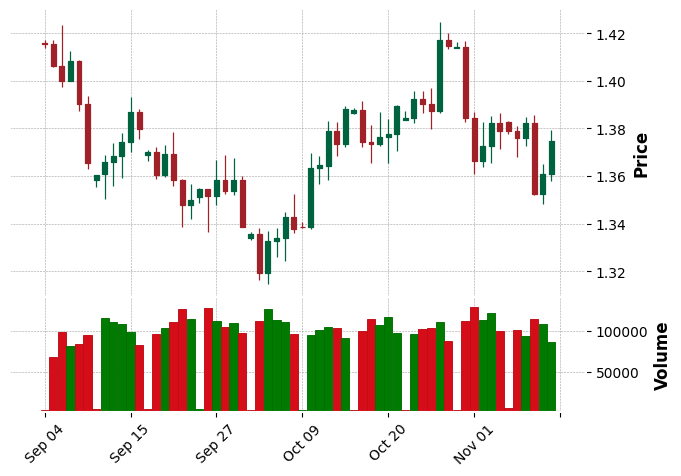

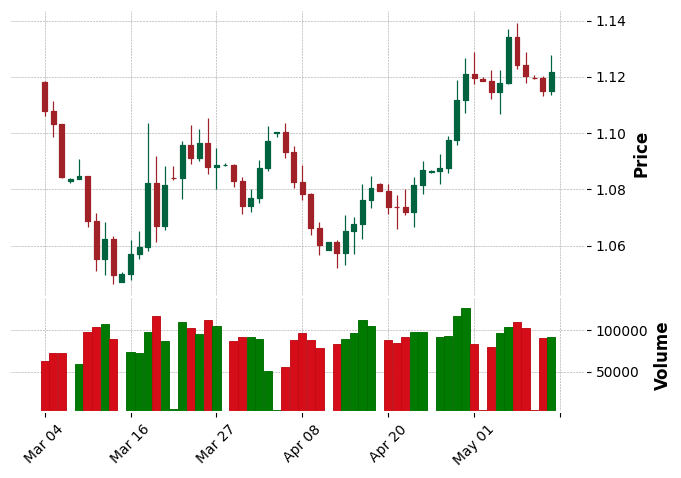

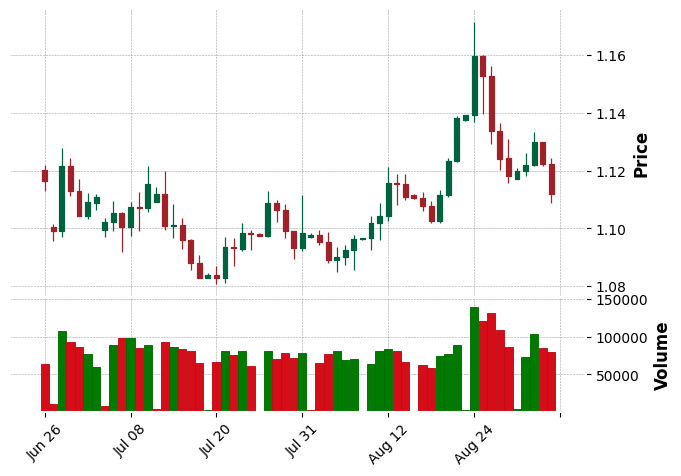

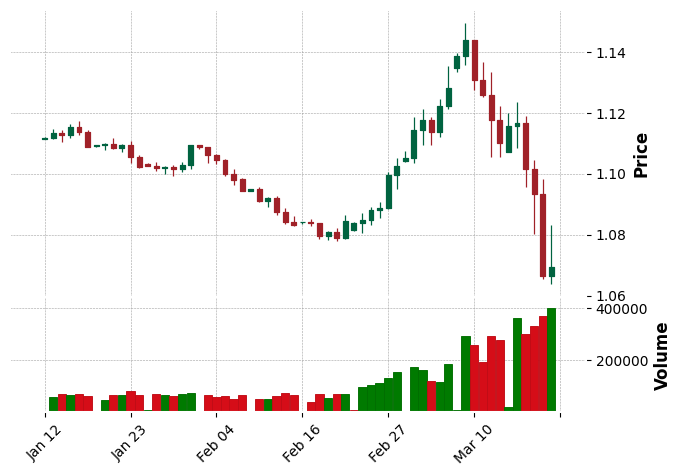

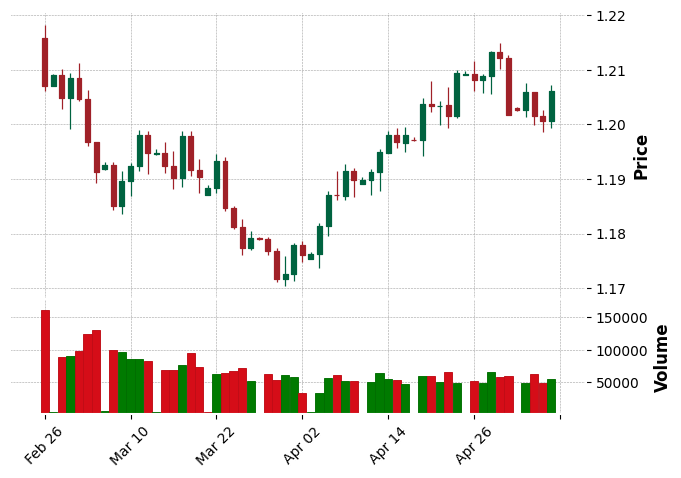

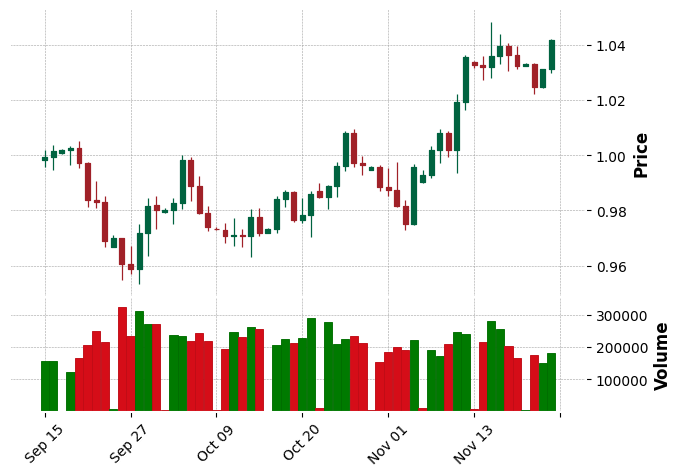

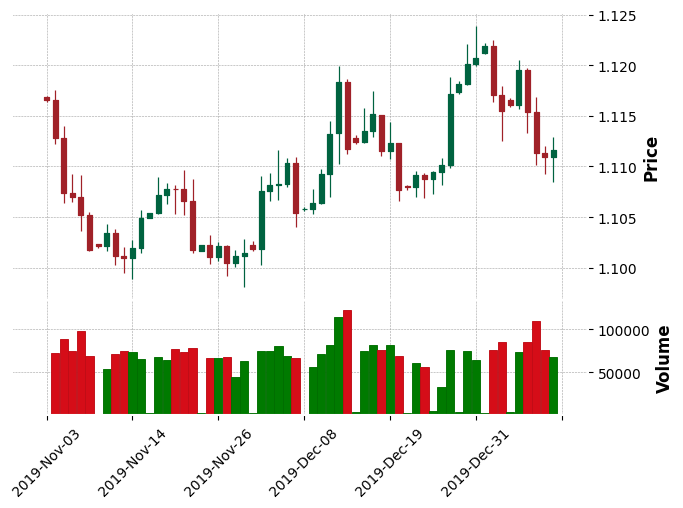

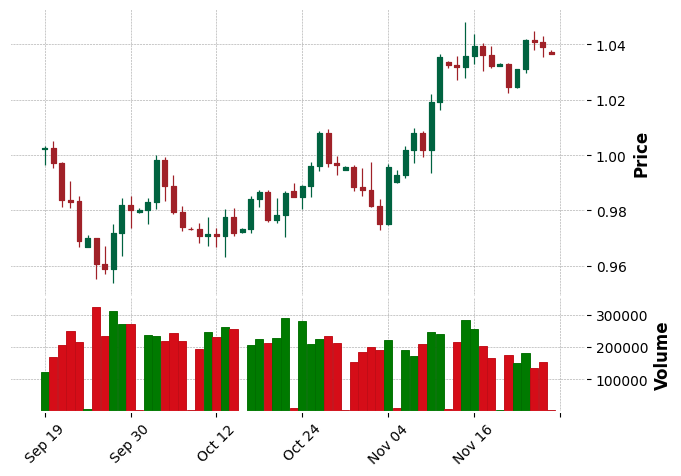

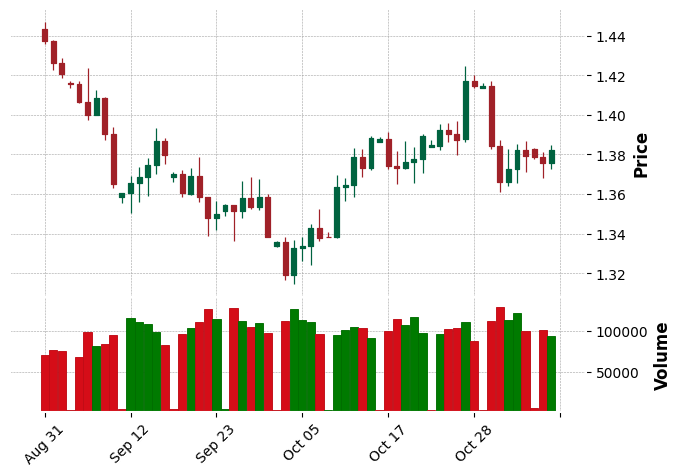

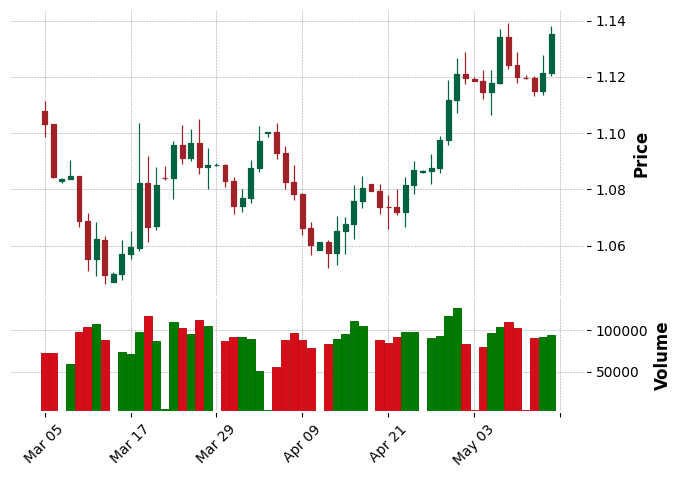

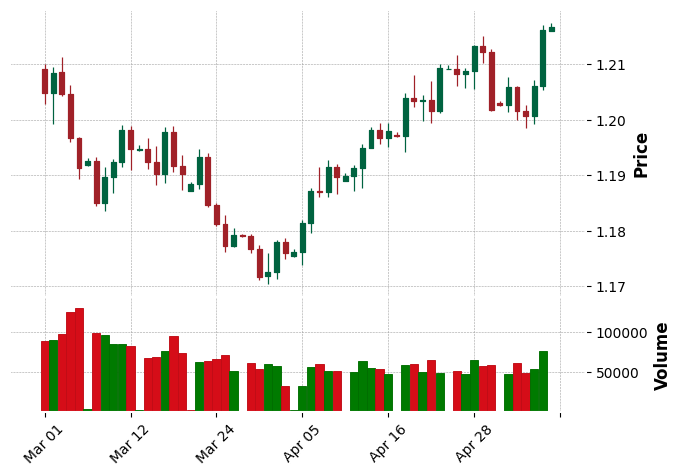

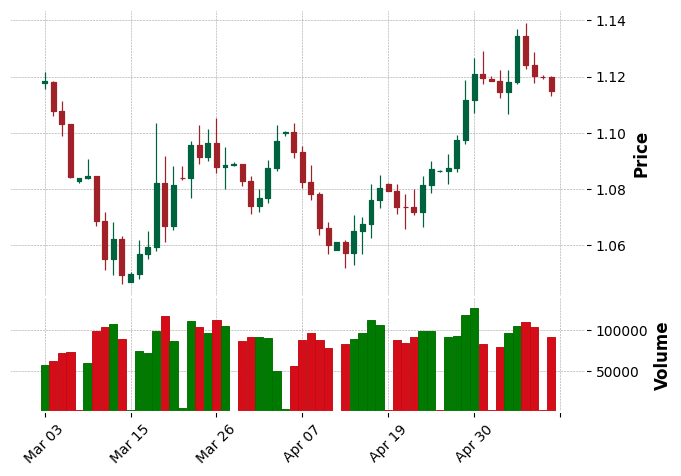

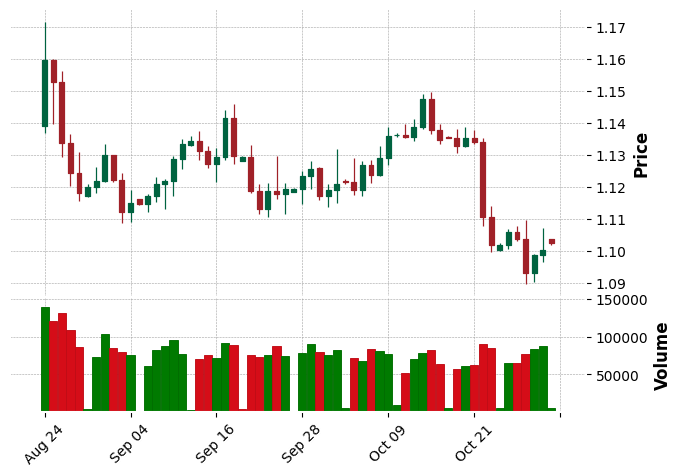

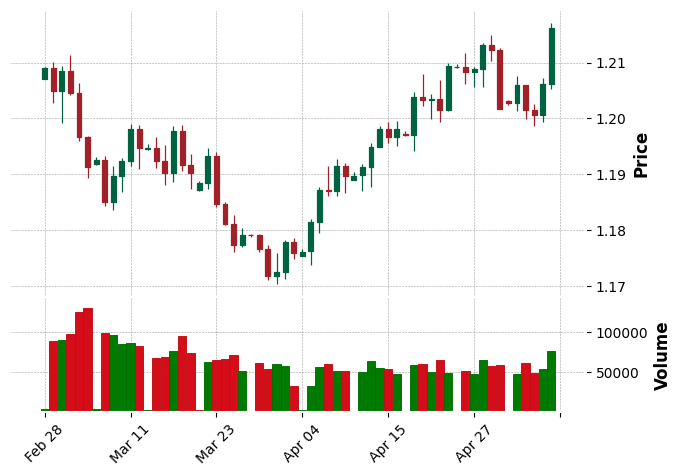

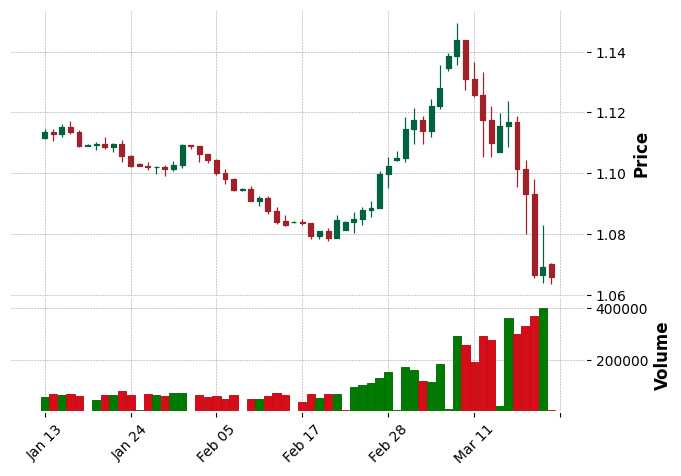

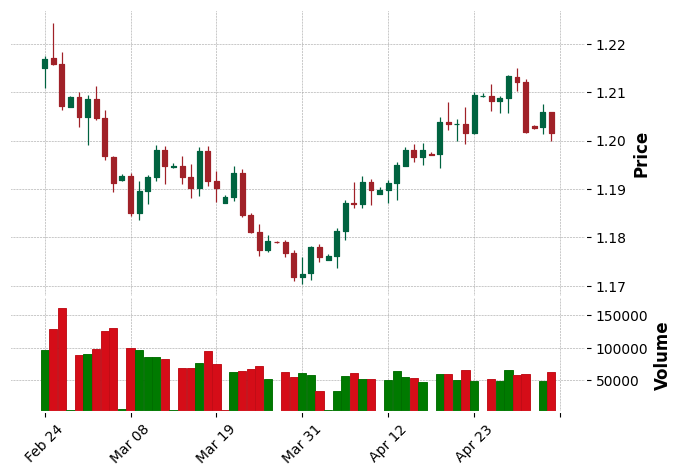

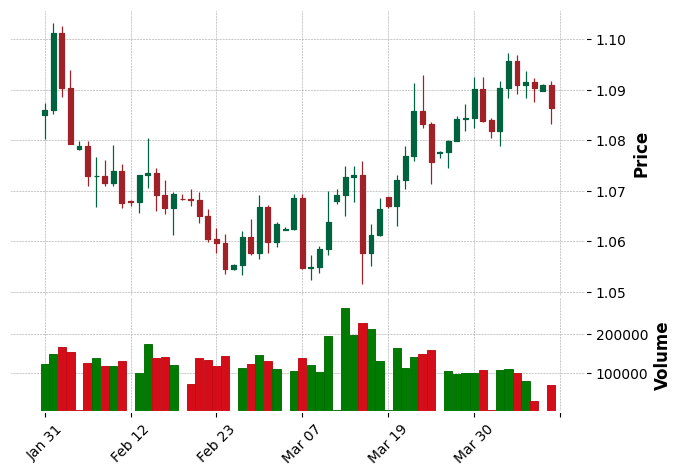

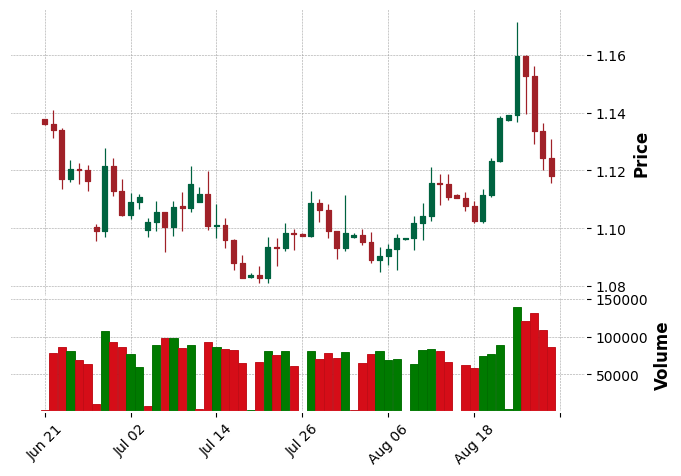

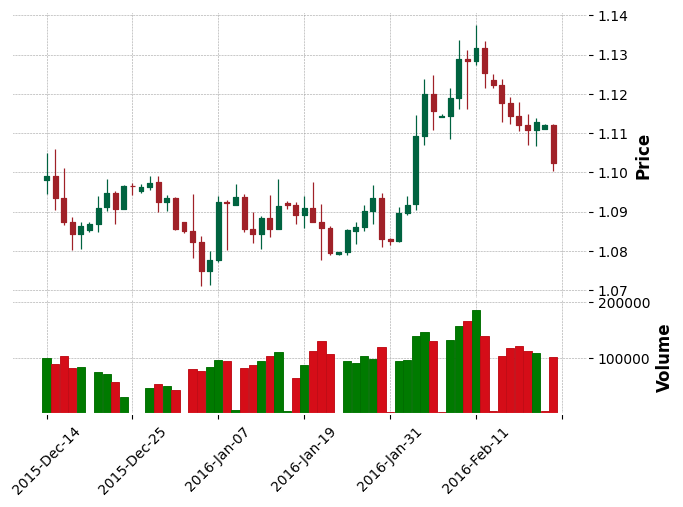

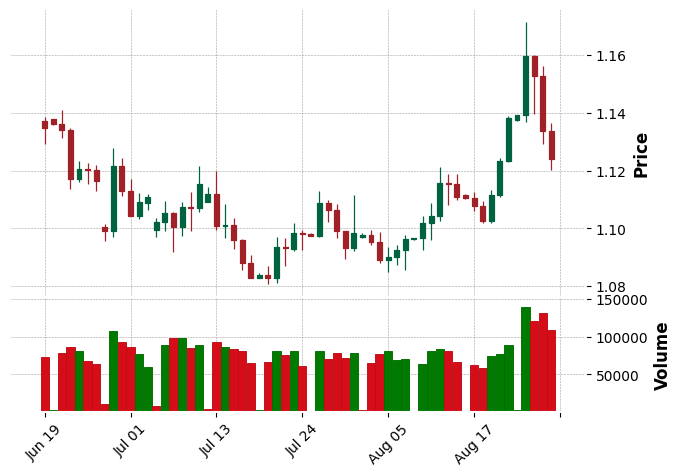

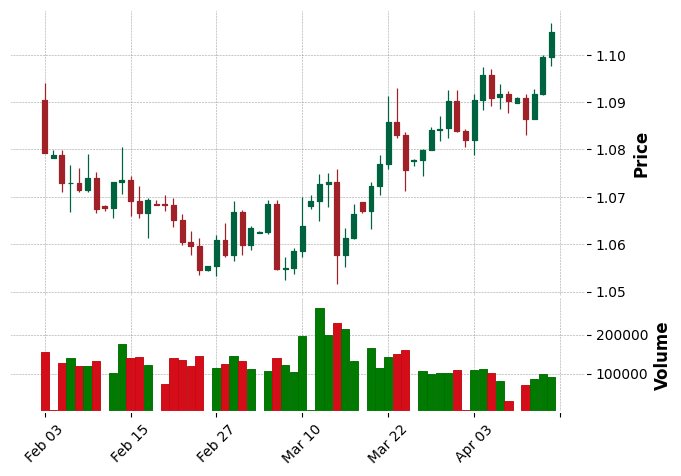

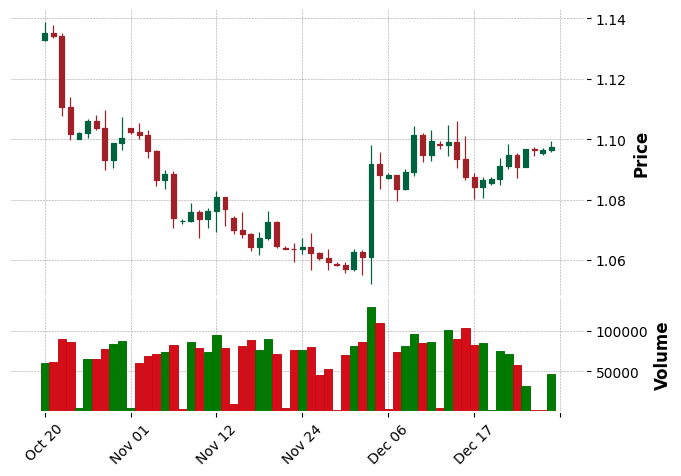

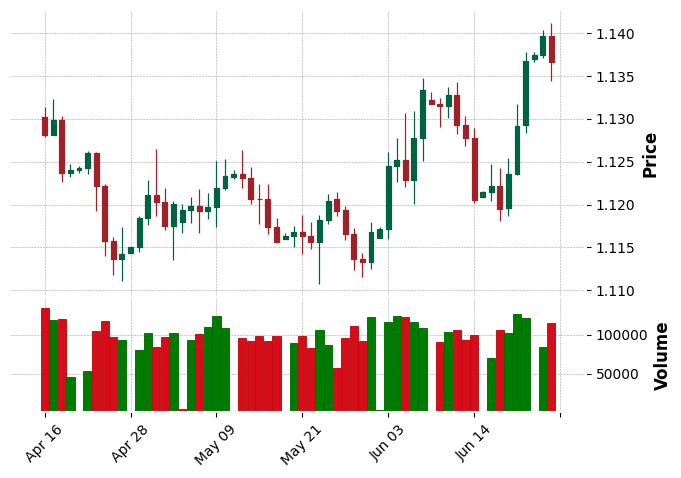

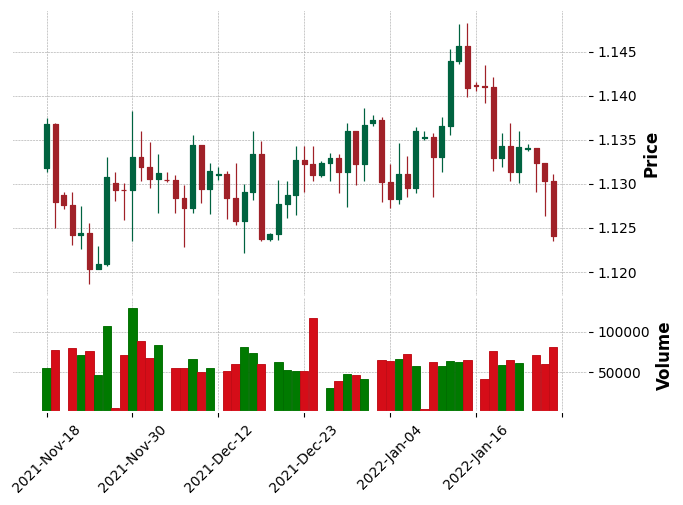

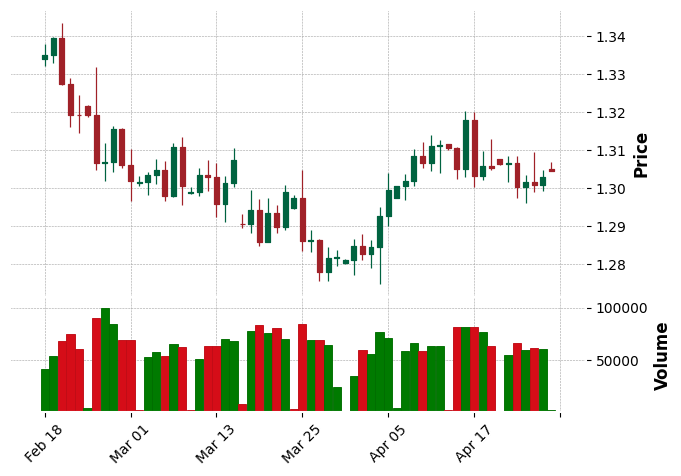

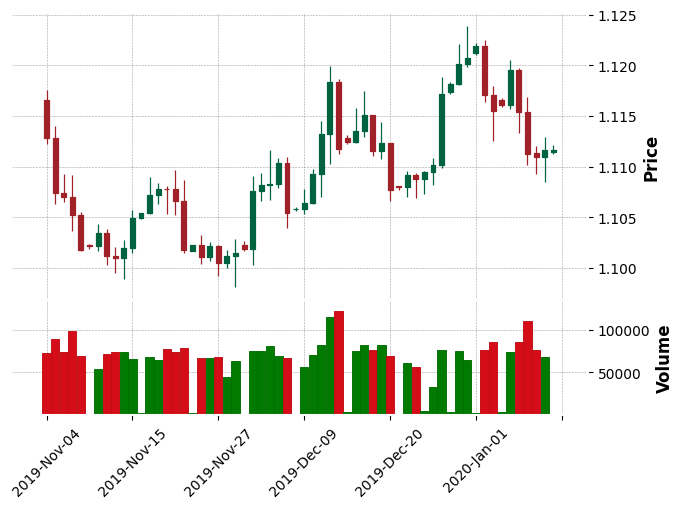

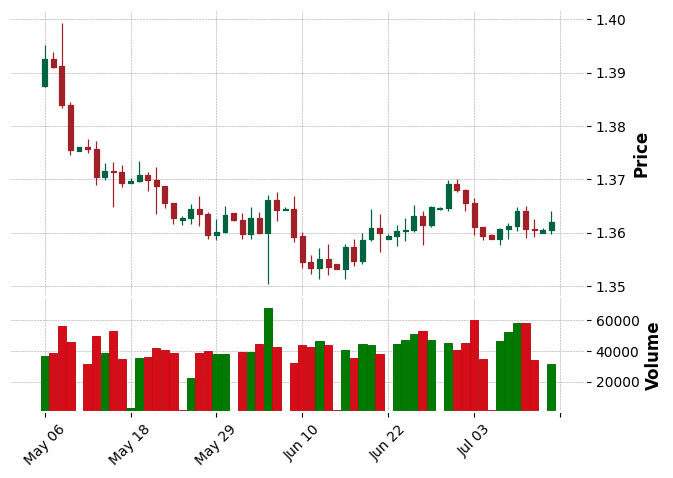

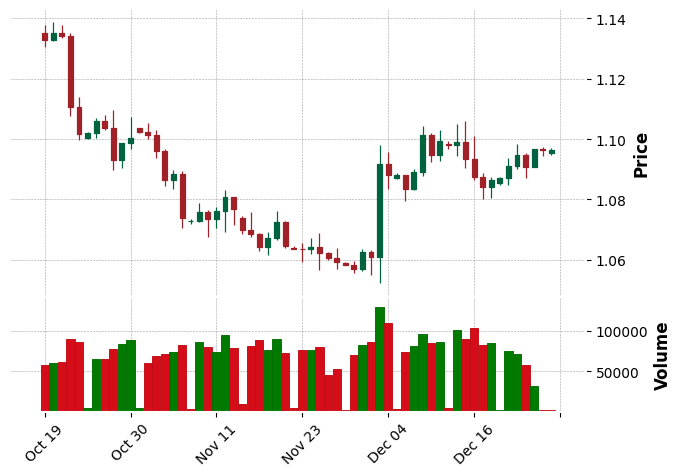

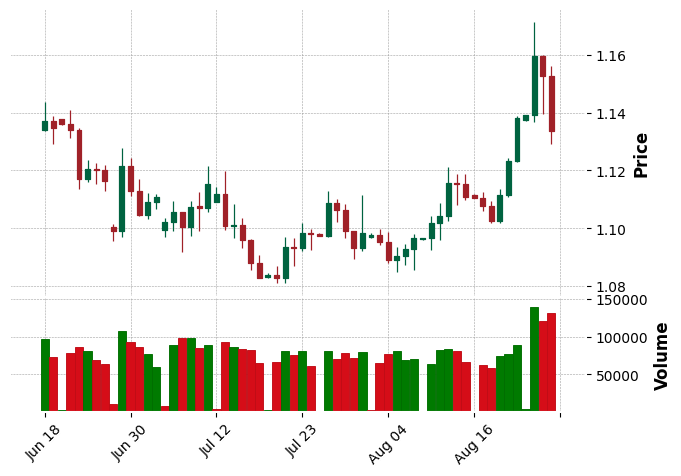

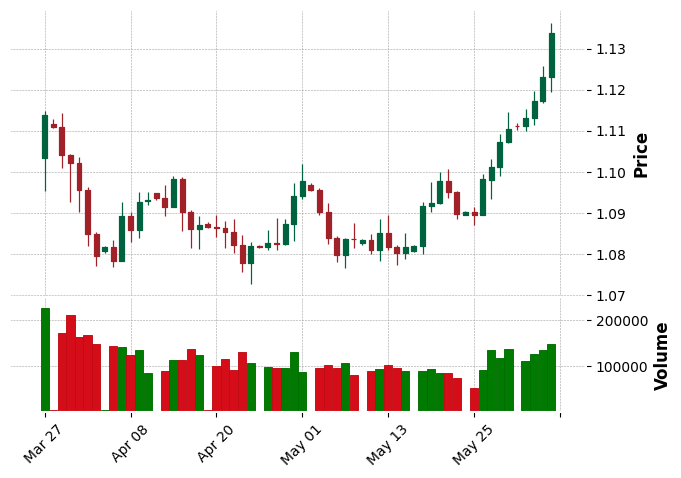

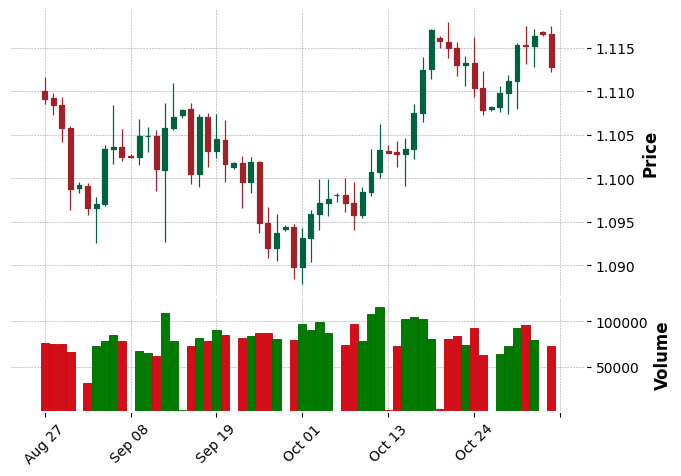

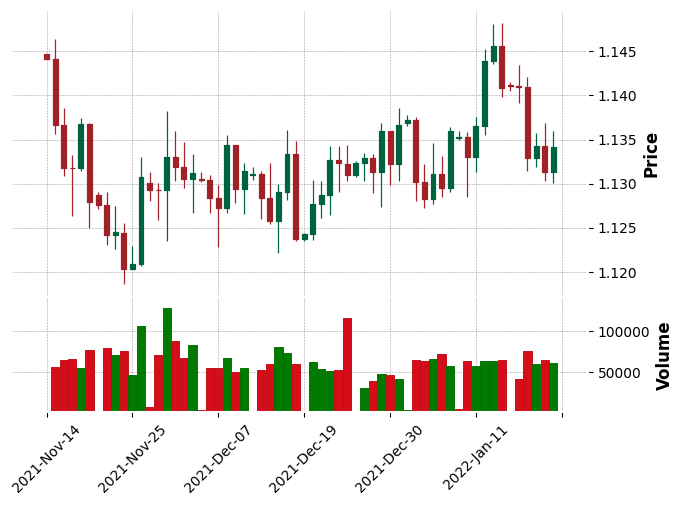

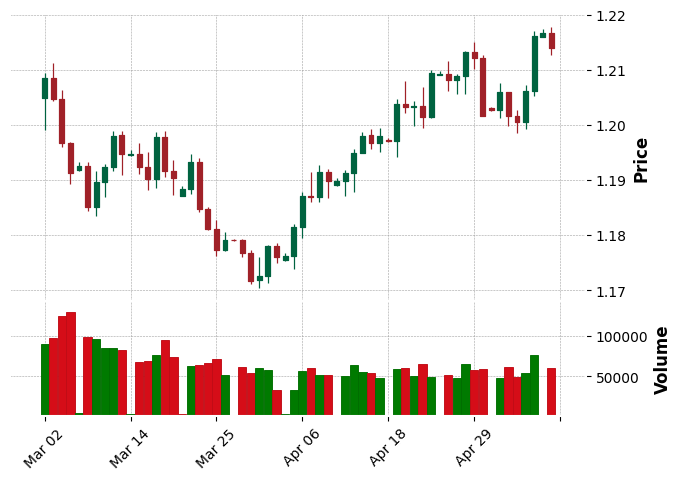

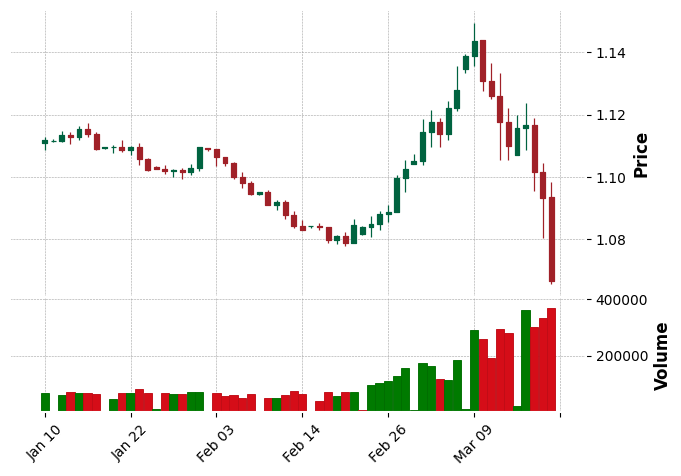

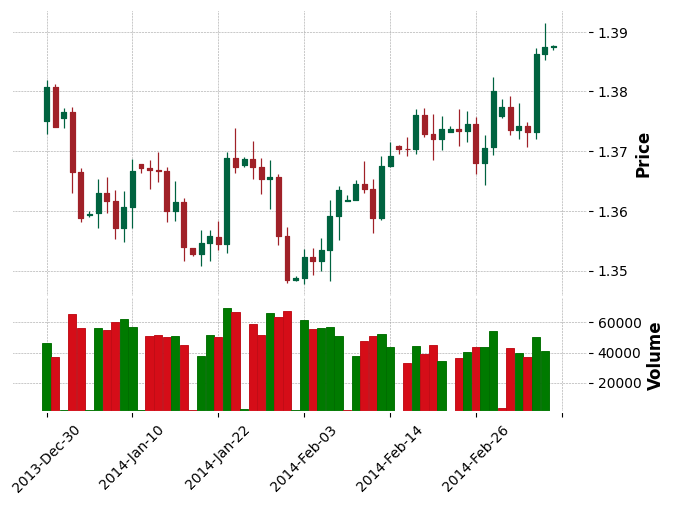

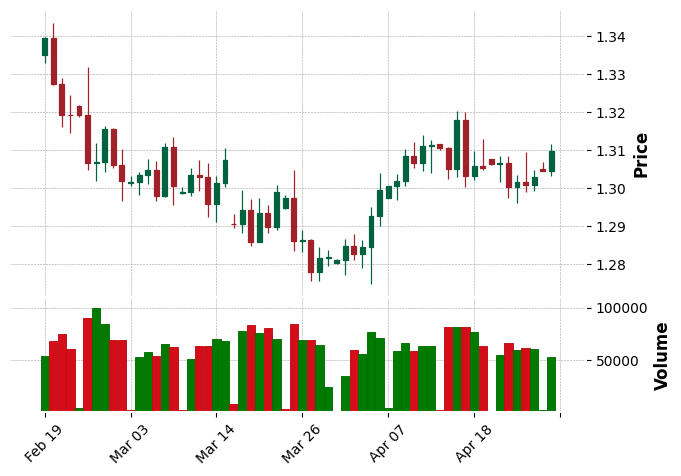

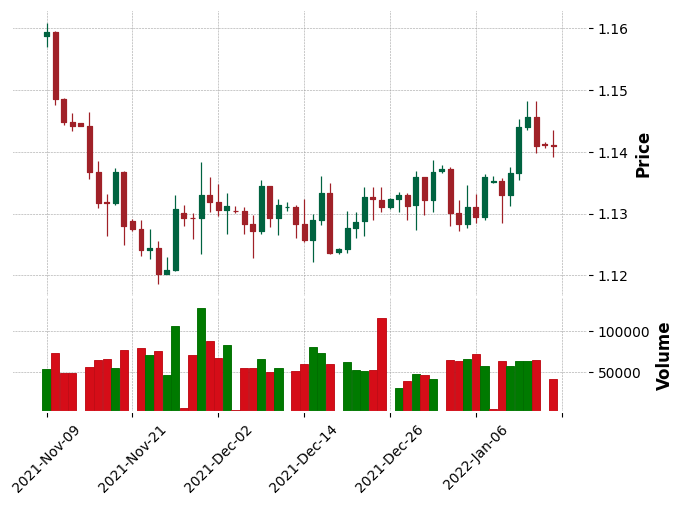

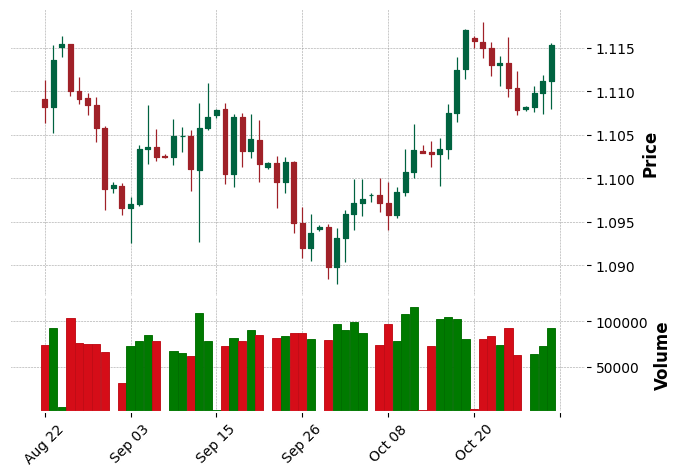

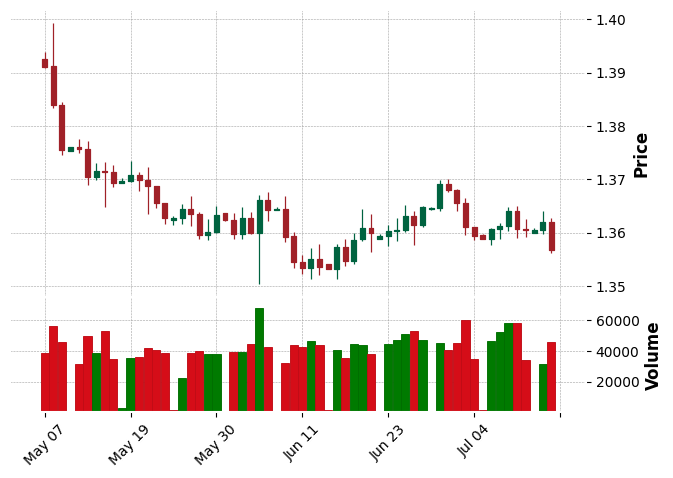

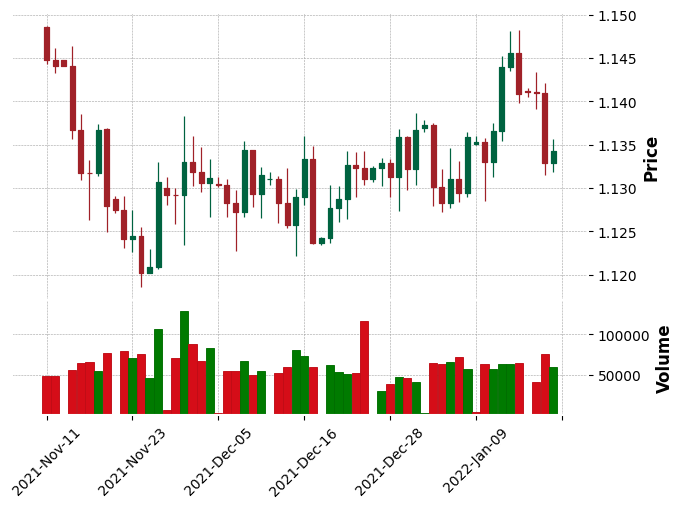

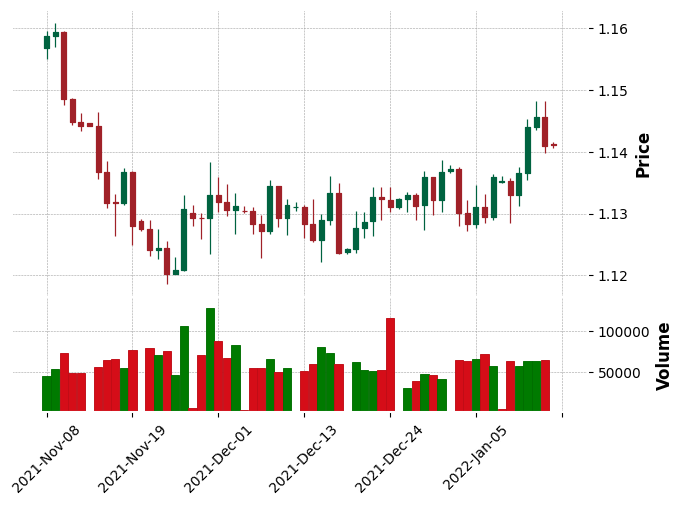

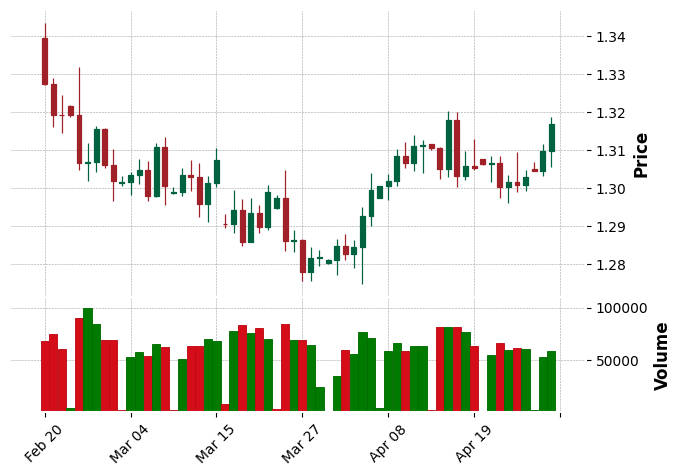

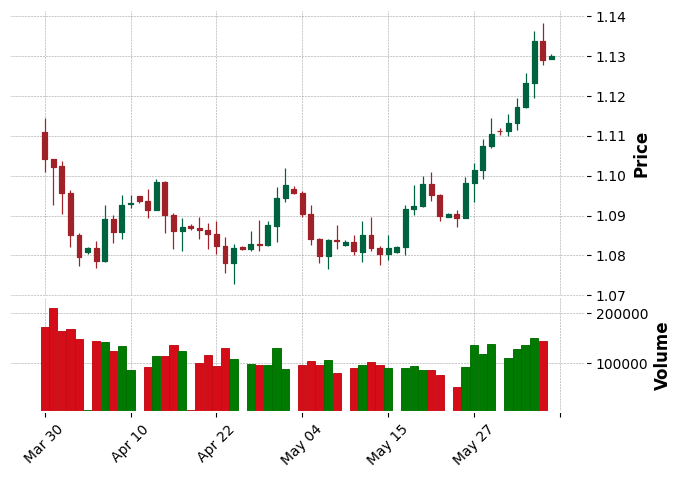

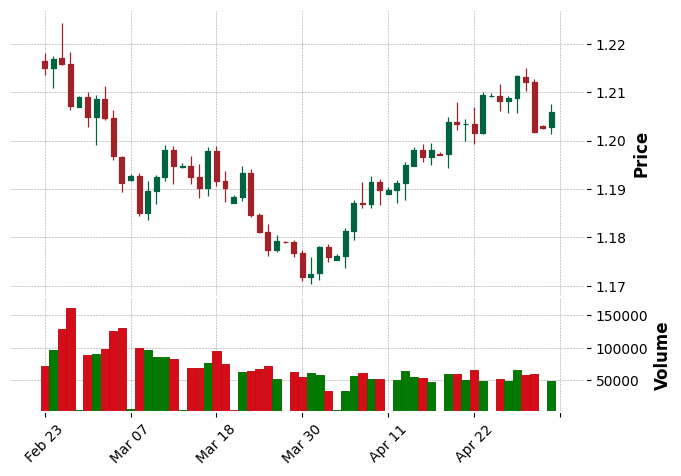

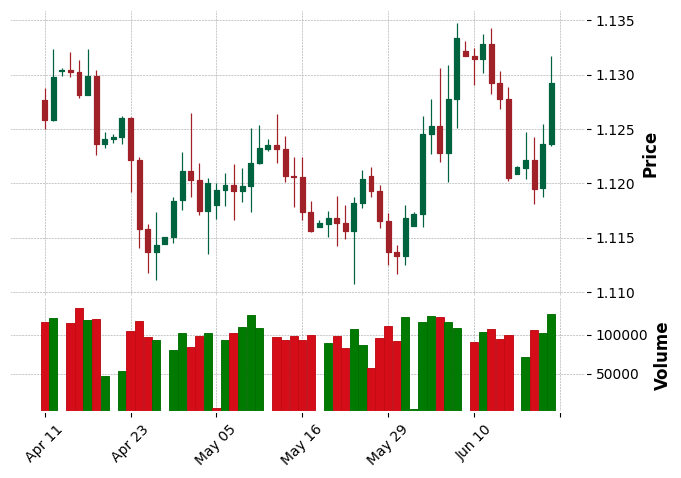

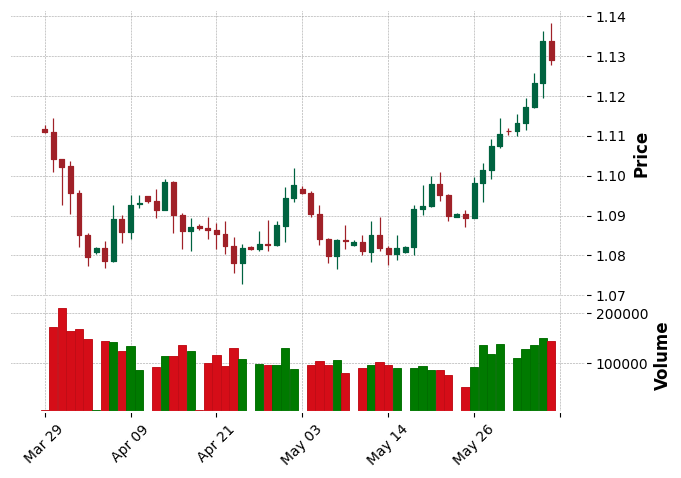

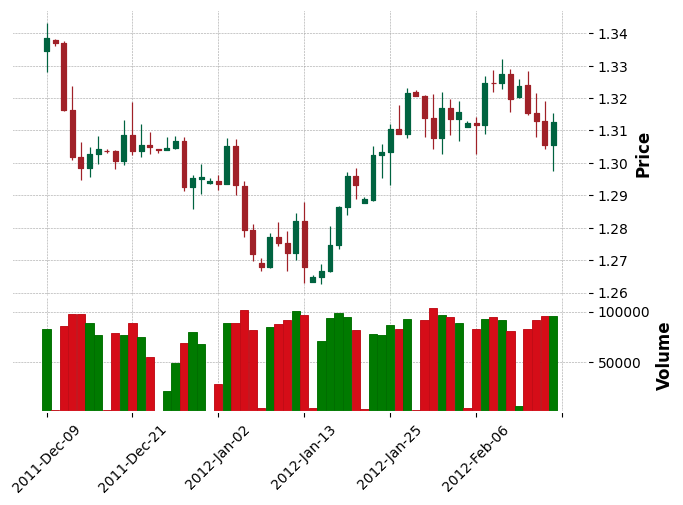

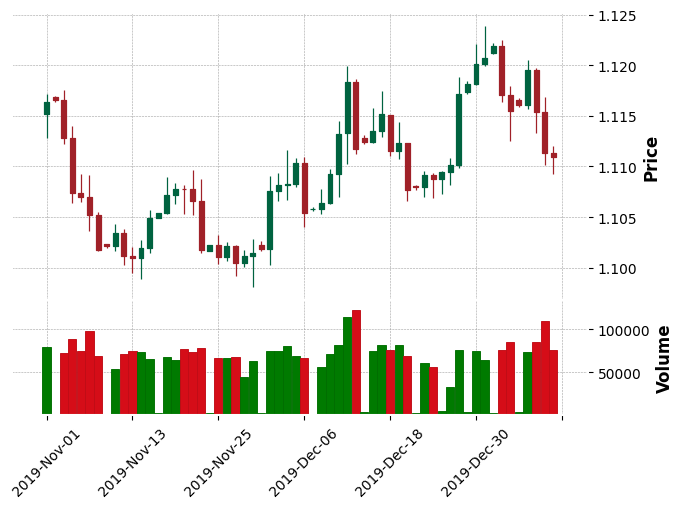

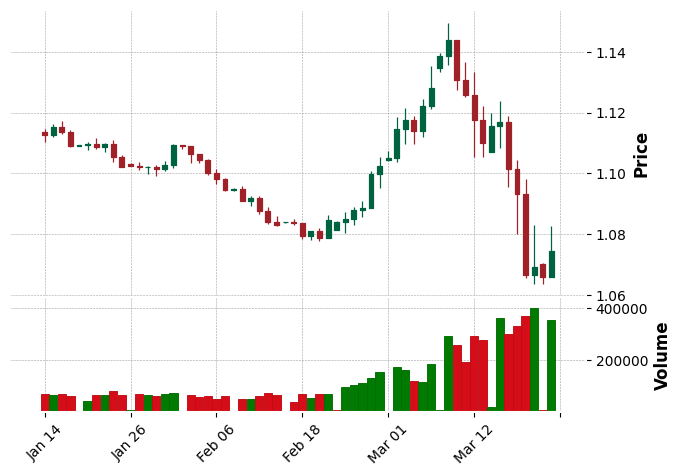

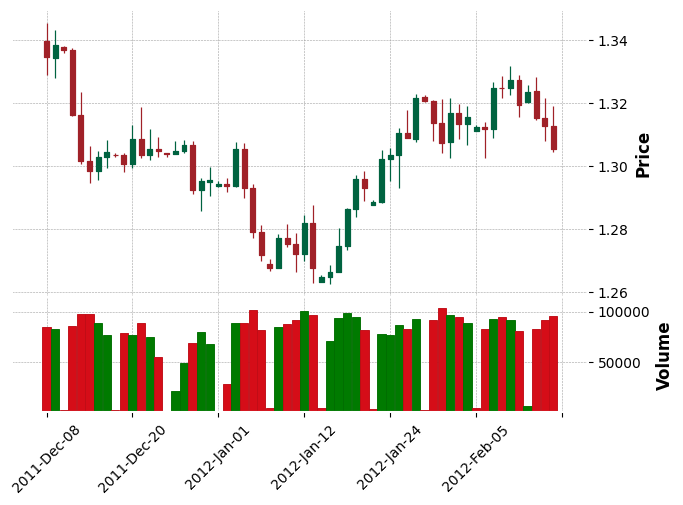

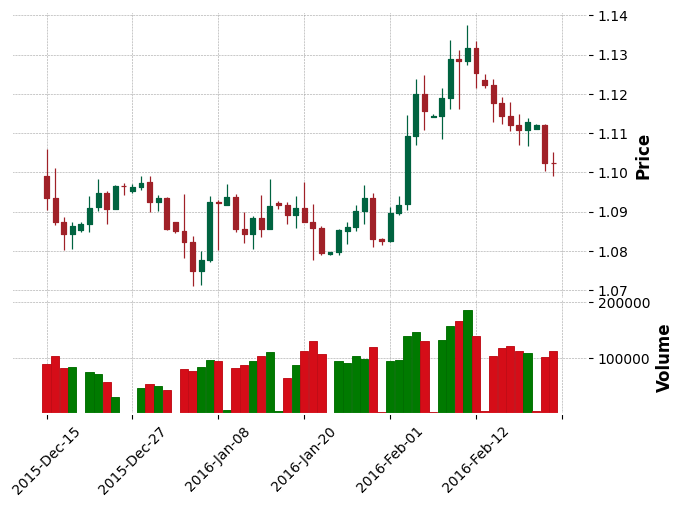

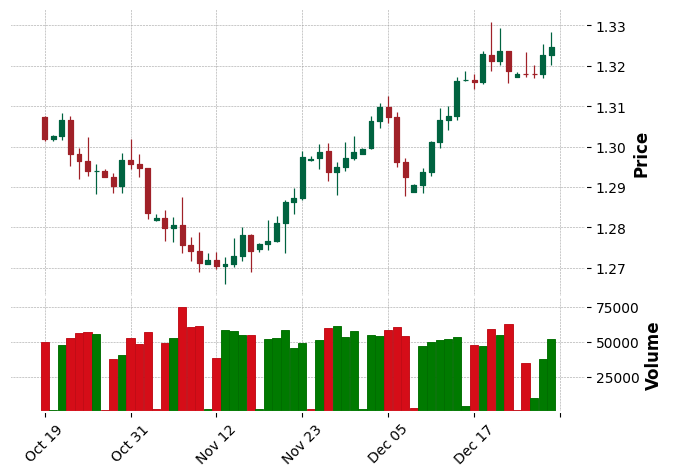

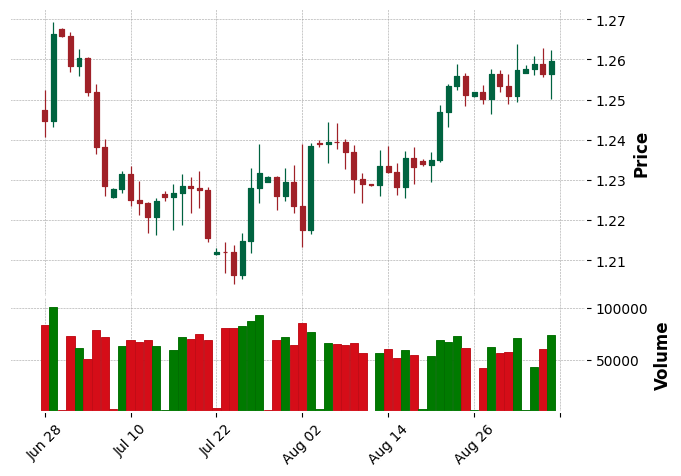

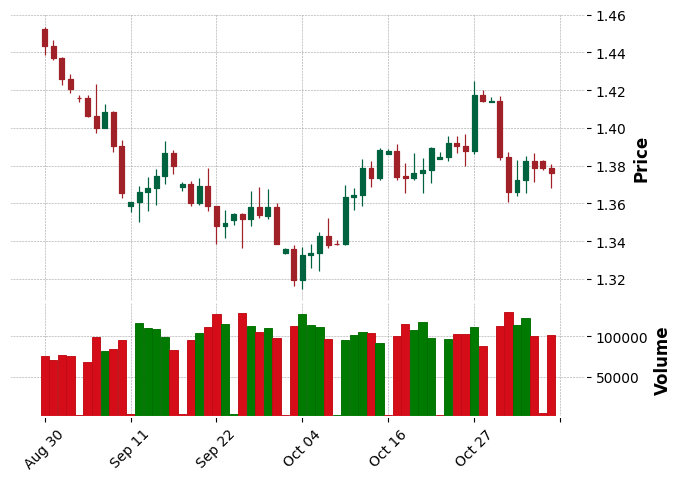

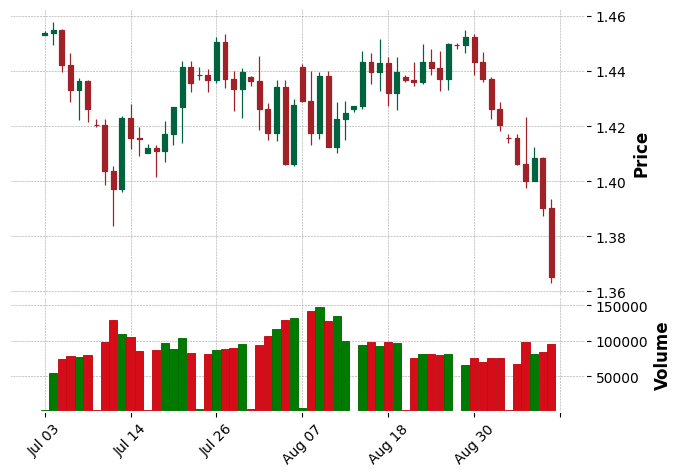

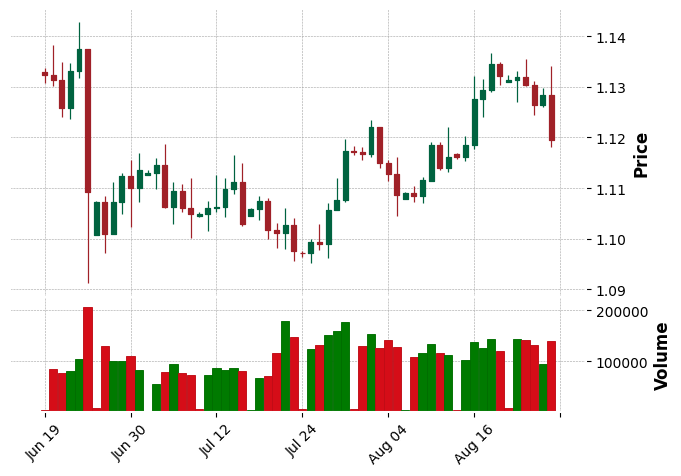

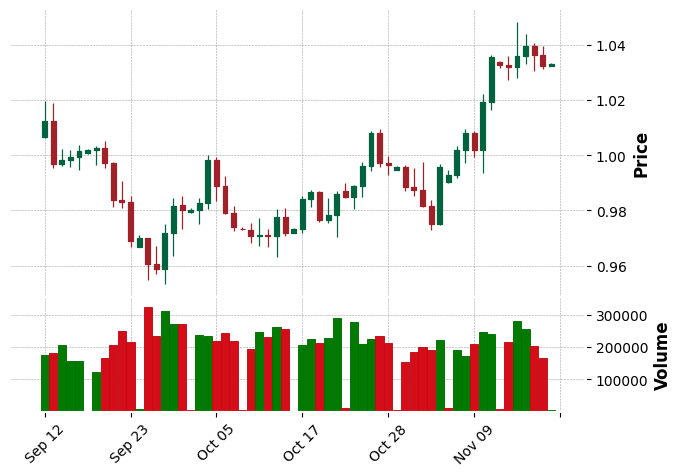

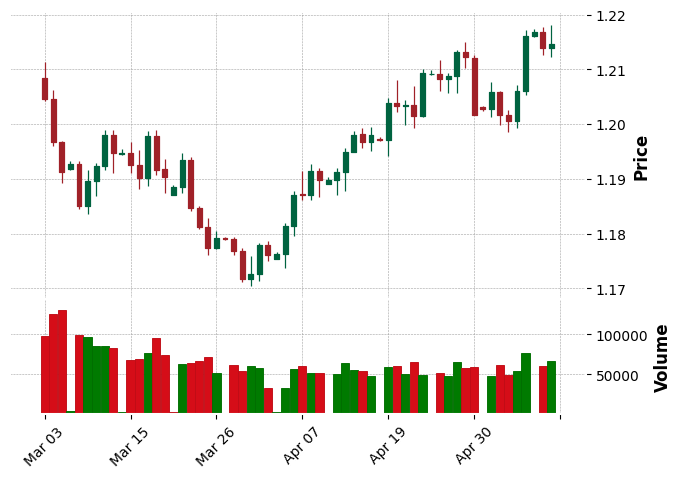

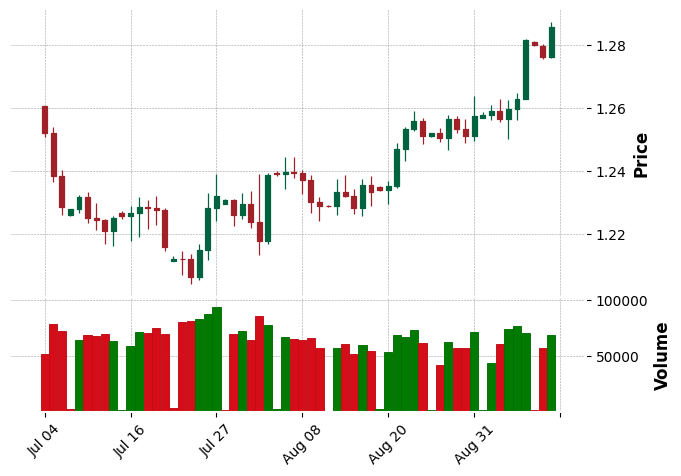

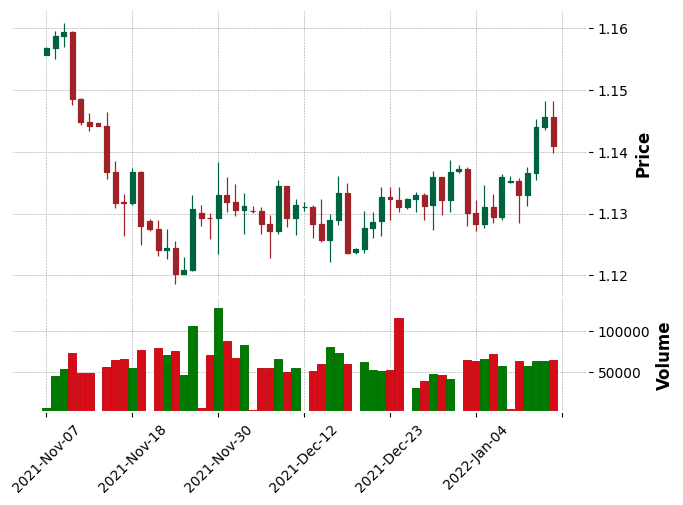

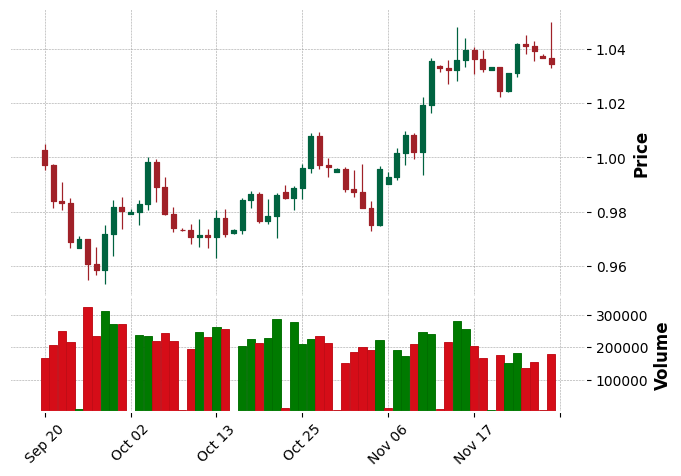

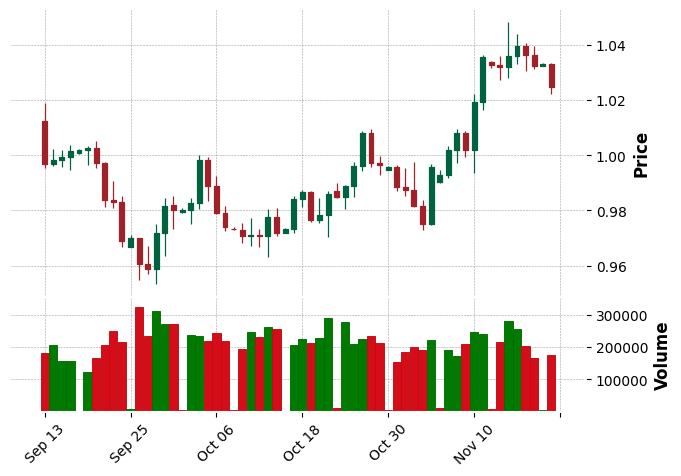

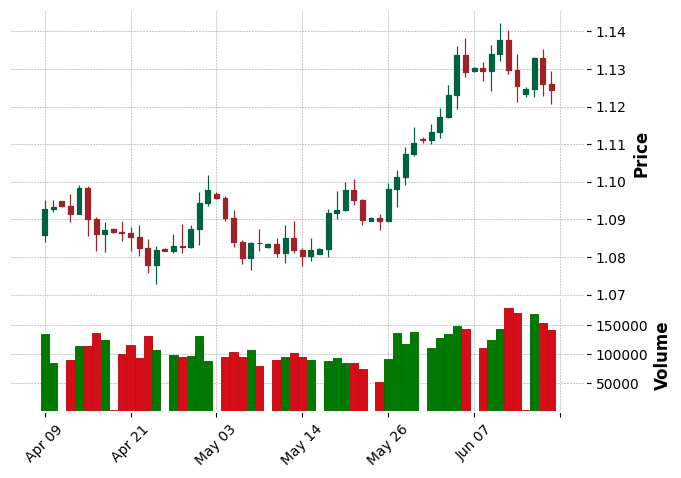

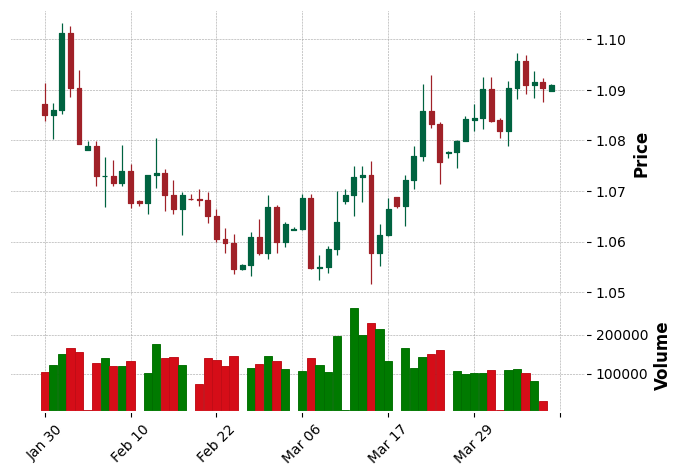

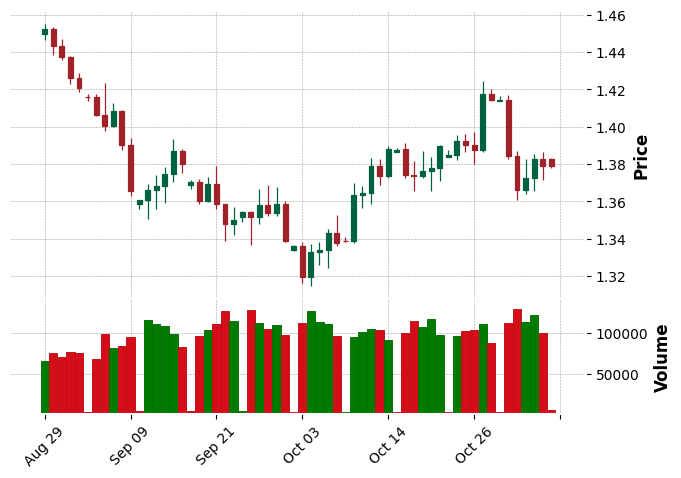

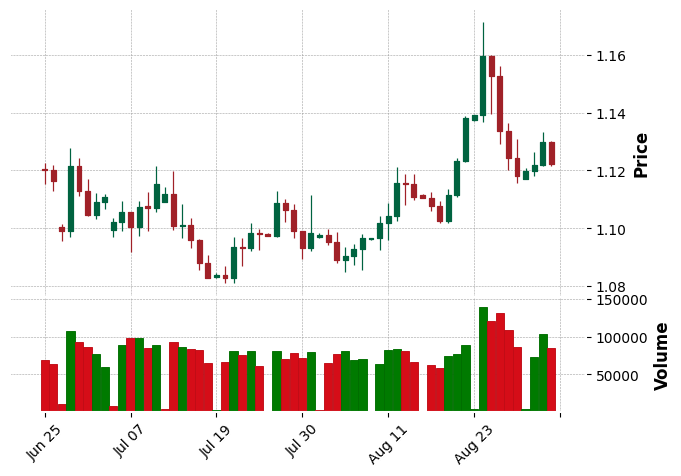

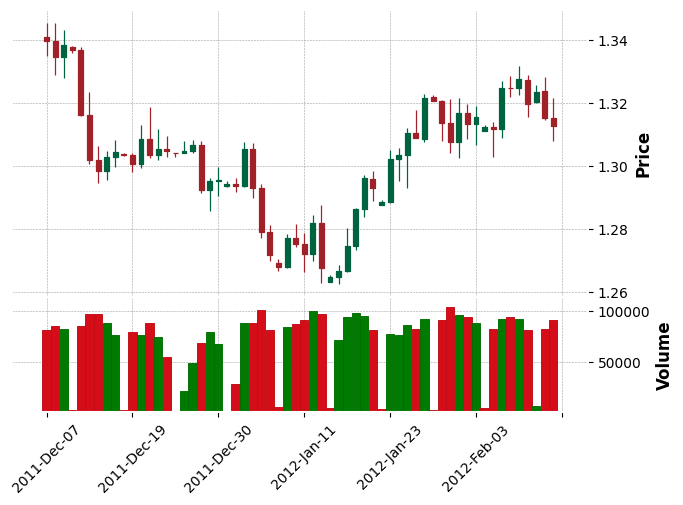

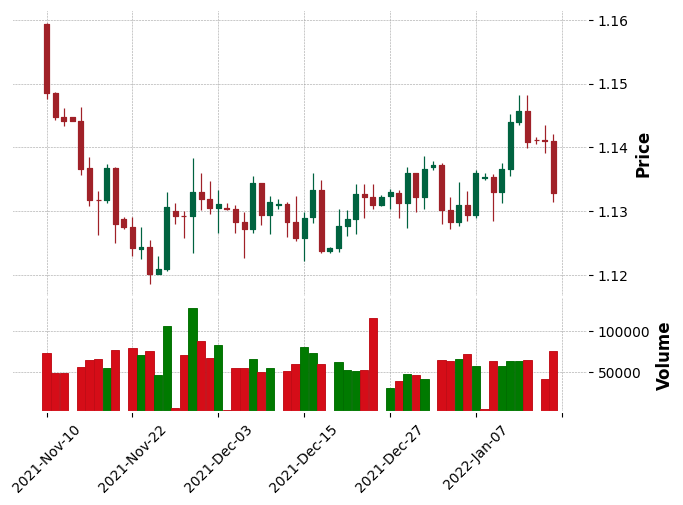

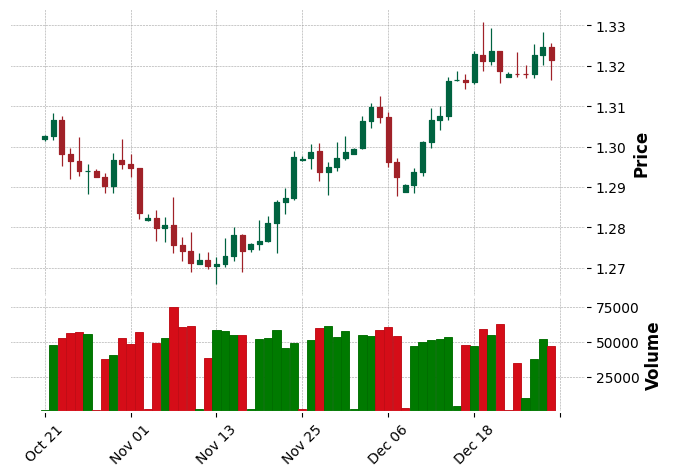

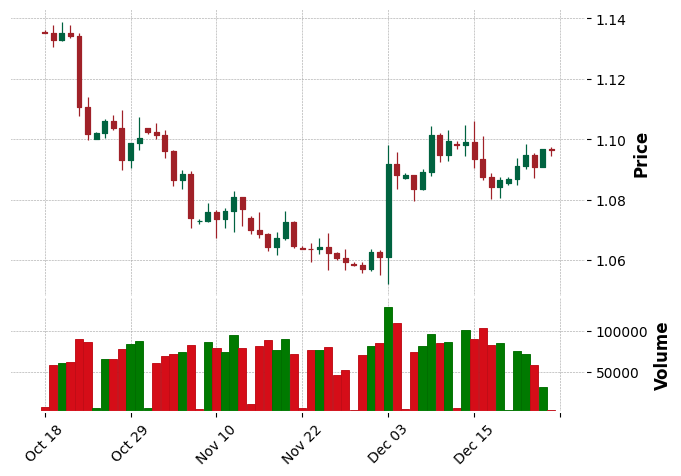

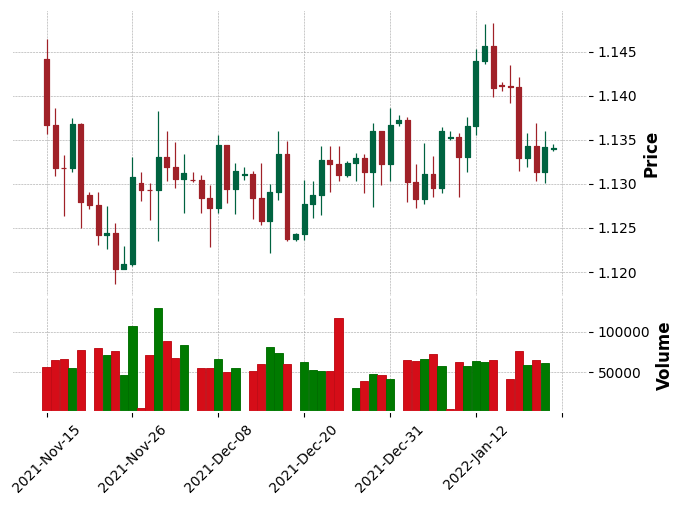

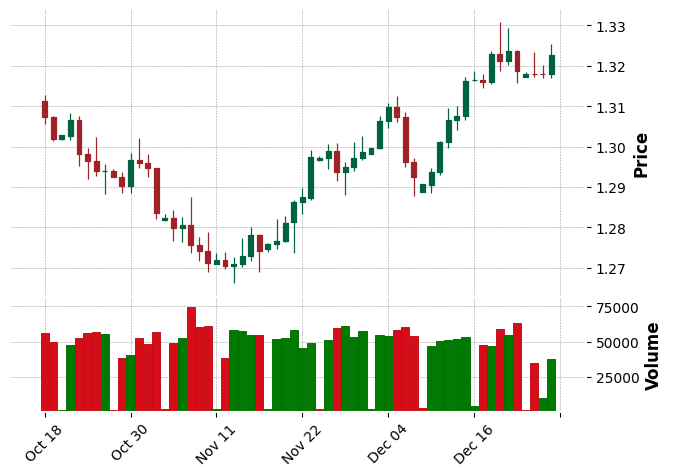

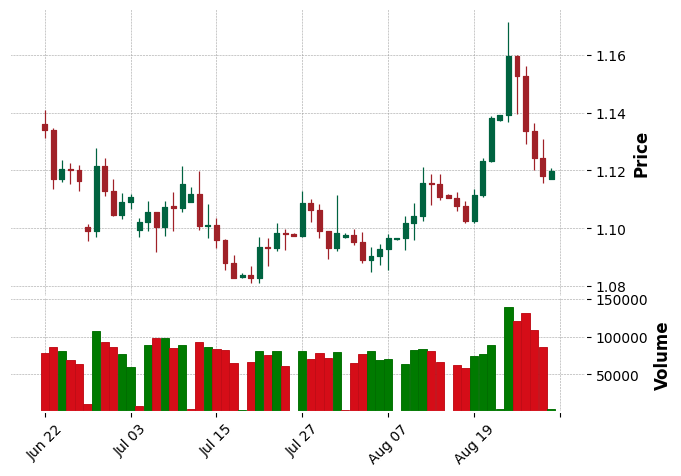

In [125]:
time_series_seq = (ohlcv[:, 2] + ohlcv[:, 3])/2
for idx, i in enumerate(np.argsort(stumpy.mass(seq_candles, time_series_seq))):
    mplf_data = pd.DataFrame(ohlcv[i:i+m+ 10, :], columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    mplf_data['Time'] = pd.to_datetime(mplf_data['Time'], unit='s') 
    mplf_data.set_index('Time', inplace=True)
    mpf.plot(mplf_data, type='candle', volume=True, style='charles')
    plt.show()
    # print(f"{mplf_data[i, 0]}")
    if idx > 100:
        break